In [1]:

import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,plot_confusion_matrix

In [2]:
import pandas as pd 
df=pd.read_csv("predictive_maintenance.csv")

df.iloc[:, :-2]

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min]
0,1,M14860,M,298.1,308.6,1551,42.8,0
1,2,L47181,L,298.2,308.7,1408,46.3,3
2,3,L47182,L,298.1,308.5,1498,49.4,5
3,4,L47183,L,298.2,308.6,1433,39.5,7
4,5,L47184,L,298.2,308.7,1408,40.0,9
...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14
9996,9997,H39410,H,298.9,308.4,1632,31.8,17
9997,9998,M24857,M,299.0,308.6,1645,33.4,22
9998,9999,H39412,H,299.0,308.7,1408,48.5,25


In [3]:
X_train = df.iloc[:, 3:-2]
X_train["Temp Different"] = - X_train["Air temperature [K]"] + X_train["Process temperature [K]"]
X_train_cols = X_train.columns
y_train = df["Target"]
X_train


,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Temp Different
0,298.1,308.6,1551,42.8,0,10.5
1,298.2,308.7,1408,46.3,3,10.5
2,298.1,308.5,1498,49.4,5,10.4
3,298.2,308.6,1433,39.5,7,10.4
4,298.2,308.7,1408,40.0,9,10.5
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,9.6
9996,298.9,308.4,1632,31.8,17,9.5
9997,299.0,308.6,1645,33.4,22,9.6
9998,299.0,308.7,1408,48.5,25,9.7


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, stratify=y_train, random_state=0)

In [5]:

X_train_cols.to_list()

['Air temperature [K]',
 'Process temperature [K]',
 'Rotational speed [rpm]',
 'Torque [Nm]',
 'Tool wear [min]',
 'Temp Different']

In [6]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=4)
selector.fit(X_train, y_train)
scores = -np.log10(selector.pvalues_)
scores /= scores.max()

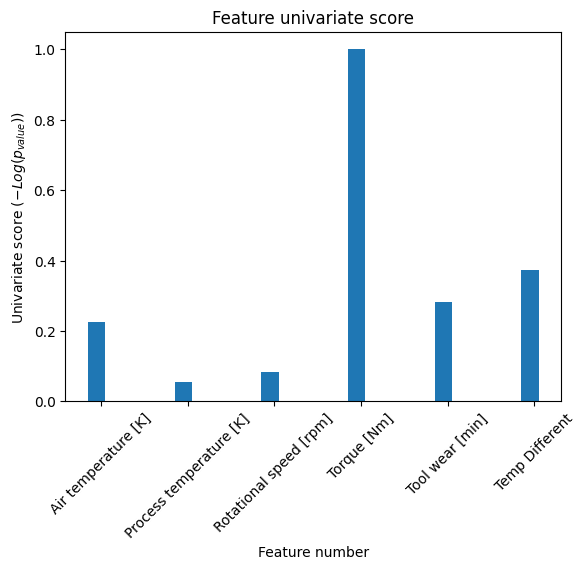

In [7]:
import matplotlib.pyplot as plt

X_indices = np.arange(X_train.shape[-1])
plt.figure(1)
plt.clf()
plt.bar(X_indices - 0.05, scores, width=0.2)
plt.title("Feature univariate score")
plt.xlabel("Feature number")
plt.ylabel(r"Univariate score ($-Log(p_{value})$)")
plt.xticks([i for i in range(6)],X_train_cols.to_list(), rotation = 45)
plt.show()

<AxesSubplot:>

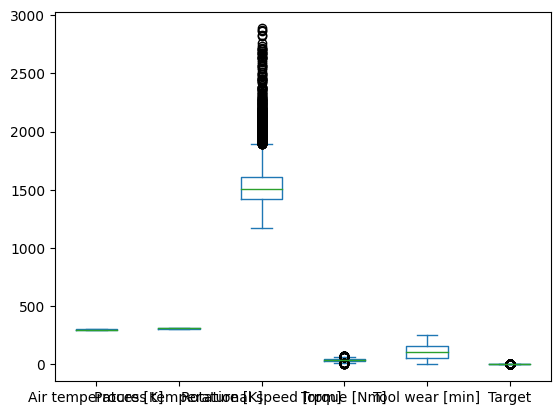

In [8]:
df.iloc[:, 3:-1].plot(kind='box')

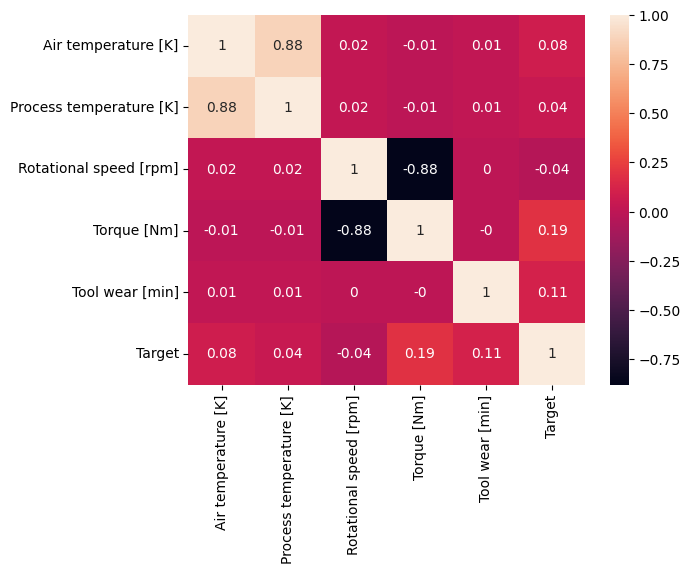

In [9]:
corr = df.iloc[:, 1:].corr()
sns.heatmap(round(corr,2), annot=True)
plt.show()

In [10]:
df

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [11]:
tc=df['Target'].value_counts()

#### The distribution of target data is as follows

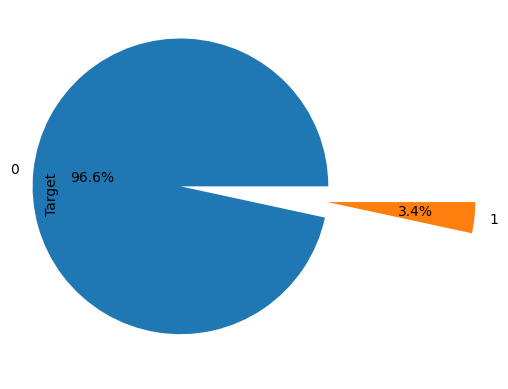

In [12]:
x=df['Target'].value_counts().plot.pie(explode=[0.5, 0.5],autopct='%1.1f%%')

### Since the failure and non failures are very disproportionate lets seperate them and plot individually 

#### Lets create a new feature temperature difference 

In [13]:
df['td']=df['Process temperature [K]']-df['Air temperature [K]']

In [14]:
df["Process_temp_normalized"]=(df["Process temperature [K]"]-min(df['Air temperature [K]']))/(max(df['Process temperature [K]'])-min(df['Air temperature [K]']))
df["Air_temp_normalized"]=(df["Air temperature [K]"]-min(df['Air temperature [K]']))/(max(df['Process temperature [K]'])-min(df['Air temperature [K]']))

In [15]:
df['Temp_diff']=df['Process_temp_normalized']=df['Air_temp_normalized']

In [16]:
df.head(20)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type,td,Process_temp_normalized,Air_temp_normalized,Temp_diff
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure,10.5,0.151351,0.151351,0.151351
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure,10.5,0.156757,0.156757,0.156757
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure,10.4,0.151351,0.151351,0.151351
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure,10.4,0.156757,0.156757,0.156757
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure,10.5,0.156757,0.156757,0.156757
5,6,M14865,M,298.1,308.6,1425,41.9,11,0,No Failure,10.5,0.151351,0.151351,0.151351
6,7,L47186,L,298.1,308.6,1558,42.4,14,0,No Failure,10.5,0.151351,0.151351,0.151351
7,8,L47187,L,298.1,308.6,1527,40.2,16,0,No Failure,10.5,0.151351,0.151351,0.151351
8,9,M14868,M,298.3,308.7,1667,28.6,18,0,No Failure,10.4,0.162162,0.162162,0.162162
9,10,M14869,M,298.5,309.0,1741,28.0,21,0,No Failure,10.5,0.172973,0.172973,0.172973


In [17]:
df_pass=df[df['Target']==0]
df_pass=df_pass[df_pass['Failure Type']=='No Failure']
df_fail=df[df['Target']==1]
df_fail=df_fail[df_fail['Failure Type']!='No Failure']

df1=df[df['Failure Type']=='Heat Dissipation Failure']
df2=df[df['Failure Type']=='Power Failure']
df3=df[df['Failure Type']=='Overstrain Failure']
df4=df[df['Failure Type']=='Tool Wear Failure']
df5=df[df['Failure Type']=='Random Failures ']

#### The distribution of temperature difference for all non failures

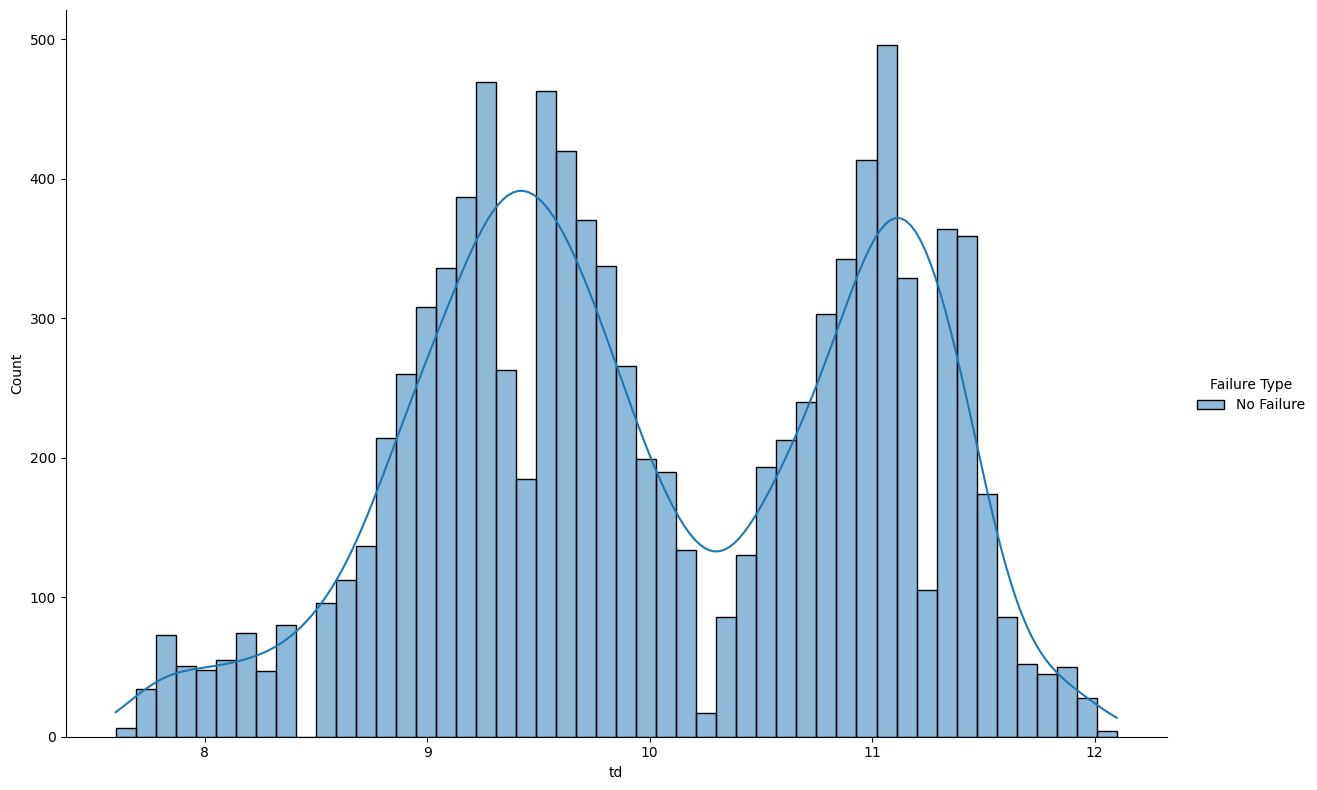

In [18]:
sns.displot(data=df_pass, x="td",hue="Failure Type", kde=True, bins = 50,height = 8, aspect =1.5)

## Distribution of temperature difference and respective failure types when failure occus is as follows

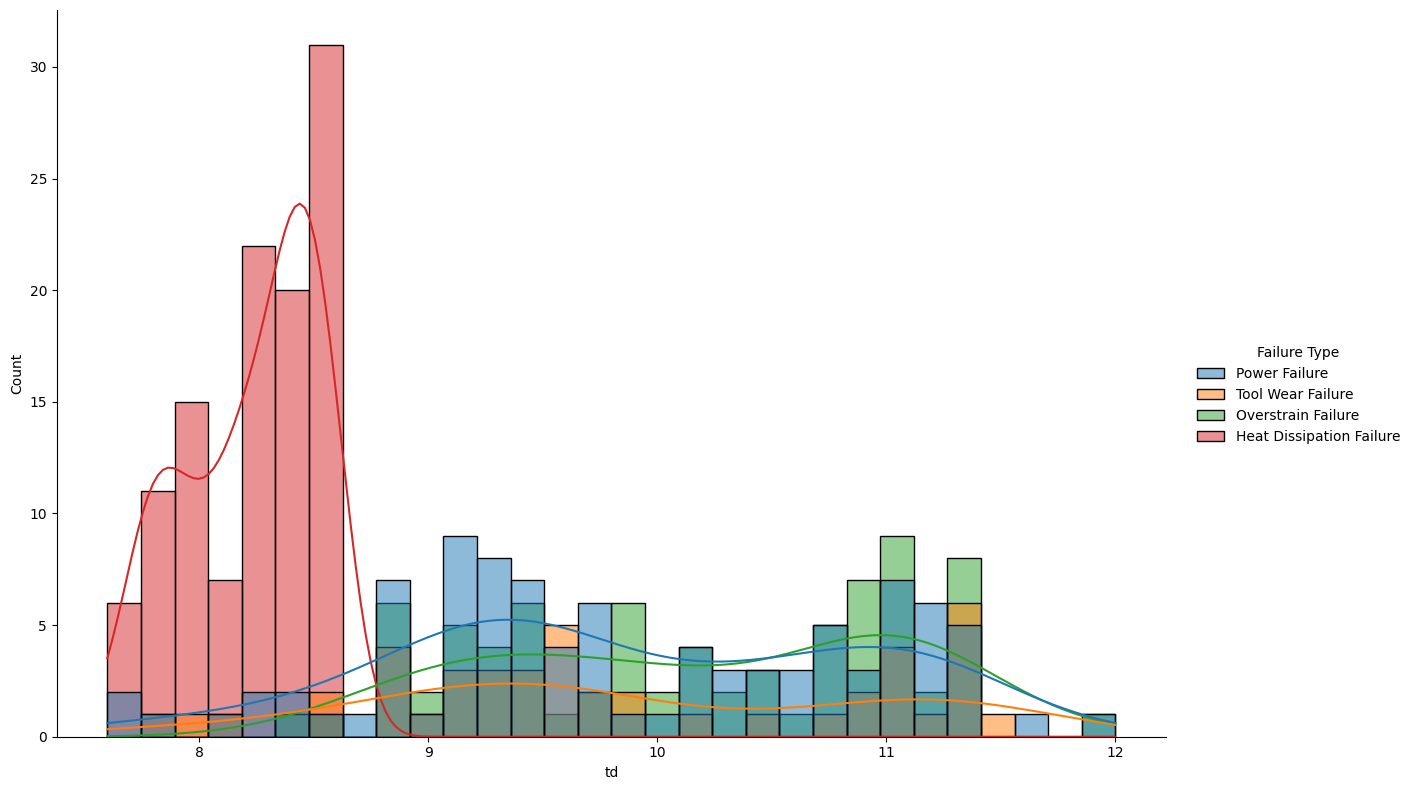

In [19]:
sns.displot(data=df_fail, x="td",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

## The distribution of air temperature when failures occur

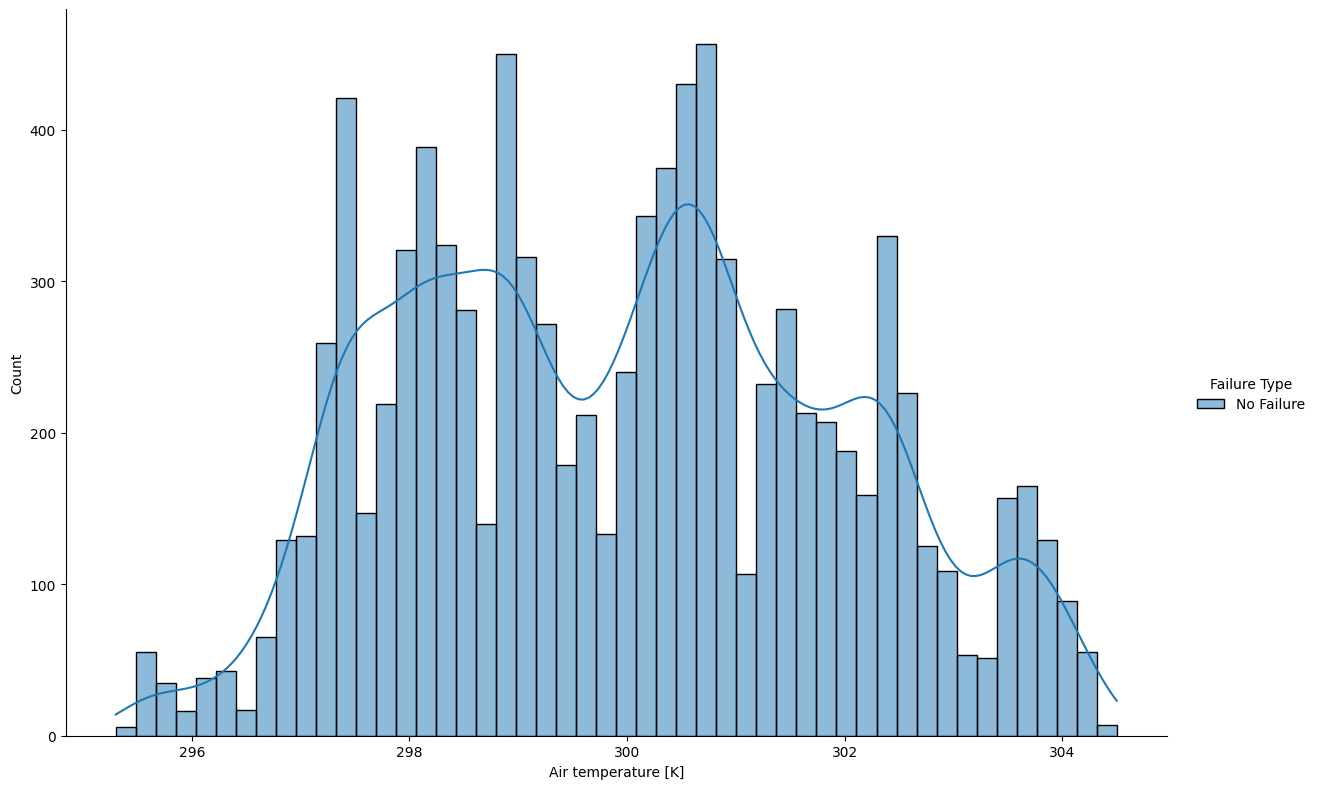

In [20]:
sns.displot(data=df_pass, x="Air temperature [K]",hue="Failure Type", kde=True, bins = 50,height = 8, aspect =1.5)

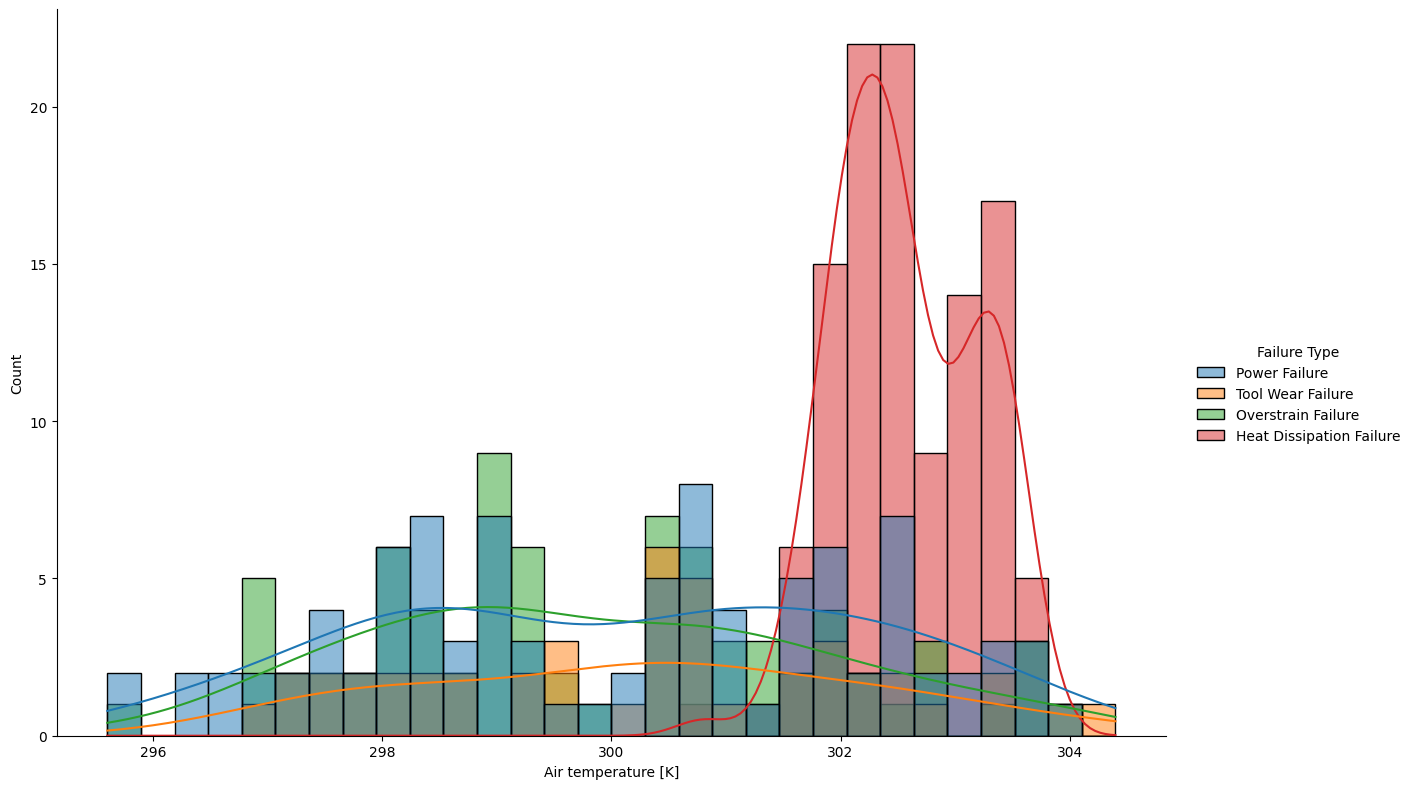

In [21]:
sns.displot(data=df_fail, x="Air temperature [K]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

## The distribution of process temperature when failure occur is shown below 

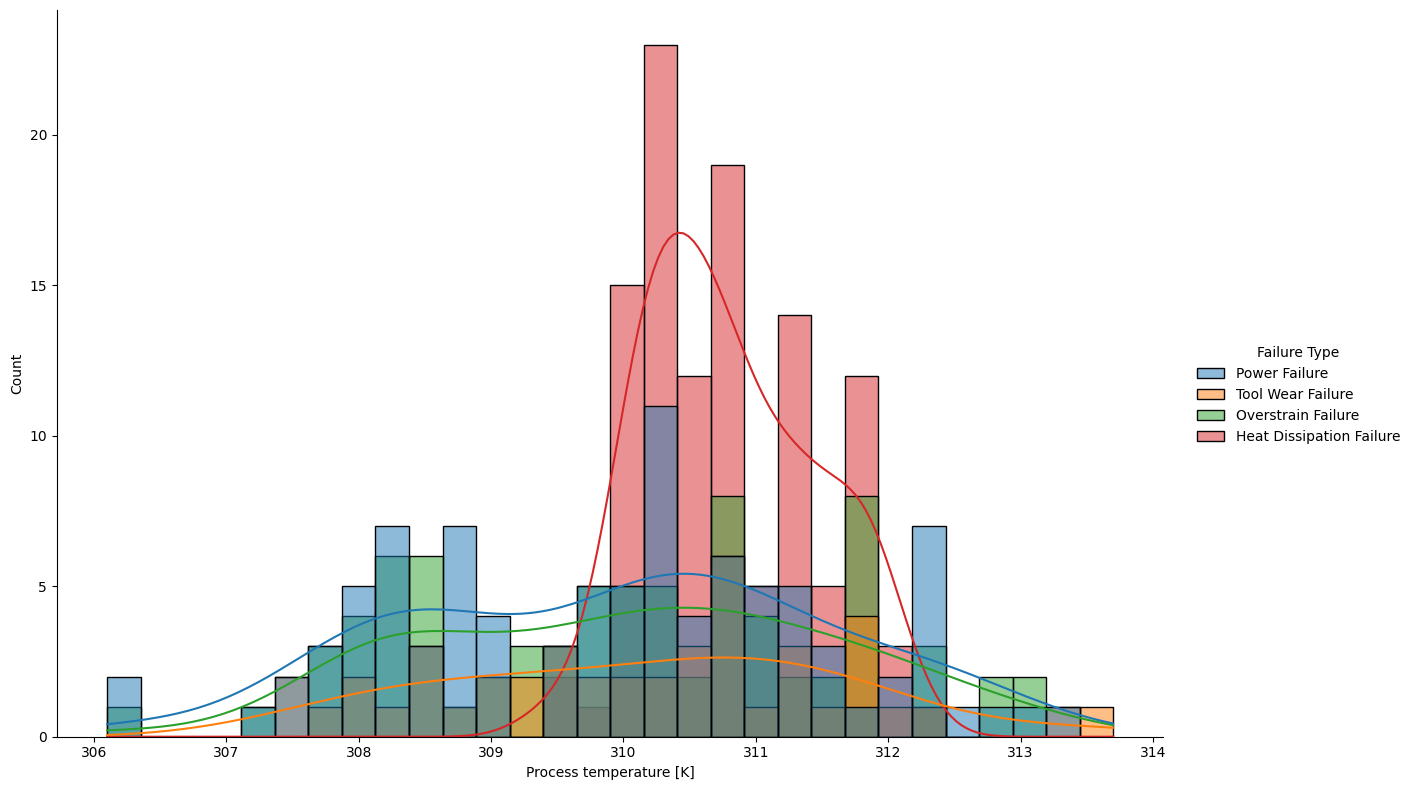

In [22]:
sns.displot(data=df_fail, x="Process temperature [K]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

##### Seening the above three plots it confirms that Heat Dissipation Failures are more dependent on temperature difference than either the air or process temperature

## The pie chart of all types os machines in our data is as follows

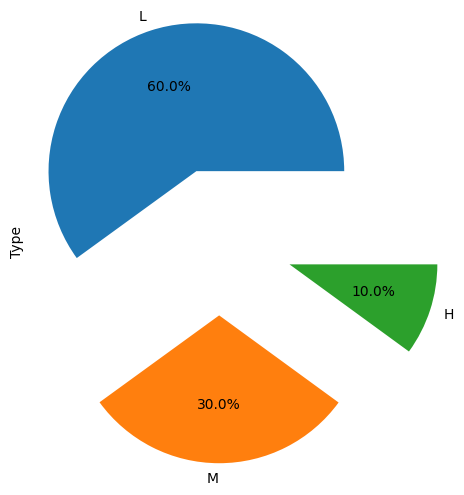

In [23]:
x=df['Type'].value_counts().plot.pie(explode=[0.5, 0.5,0.5],autopct='%1.1f%%')

## Pie chart of total machines that do not fail

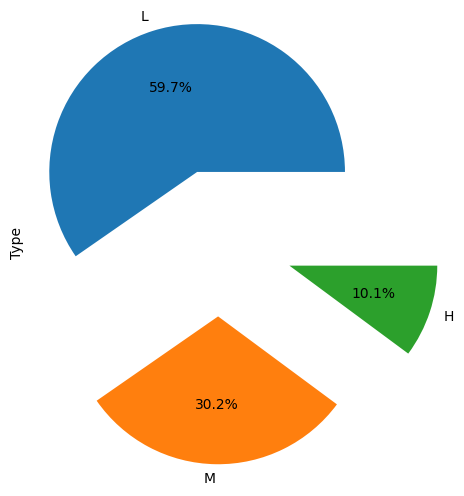

In [24]:
x=df_pass['Type'].value_counts().plot.pie(explode=[0.5, 0.5,0.5],autopct='%1.1f%%')

## Pie chart of machines that failed

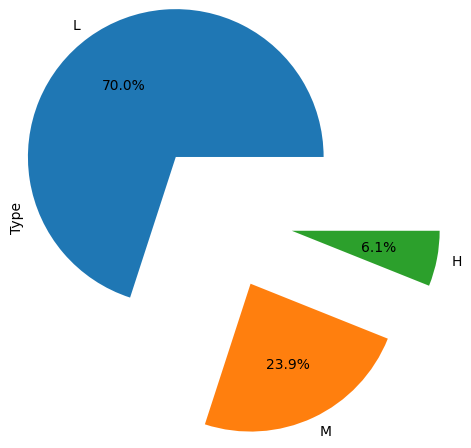

In [25]:
x=df_fail['Type'].value_counts().plot.pie(explode=[0.5, 0.5,0.5],autopct='%1.1f%%')

#### In conclusion machines of type H fail less often

## The distribution of RPM on failed data is shown below

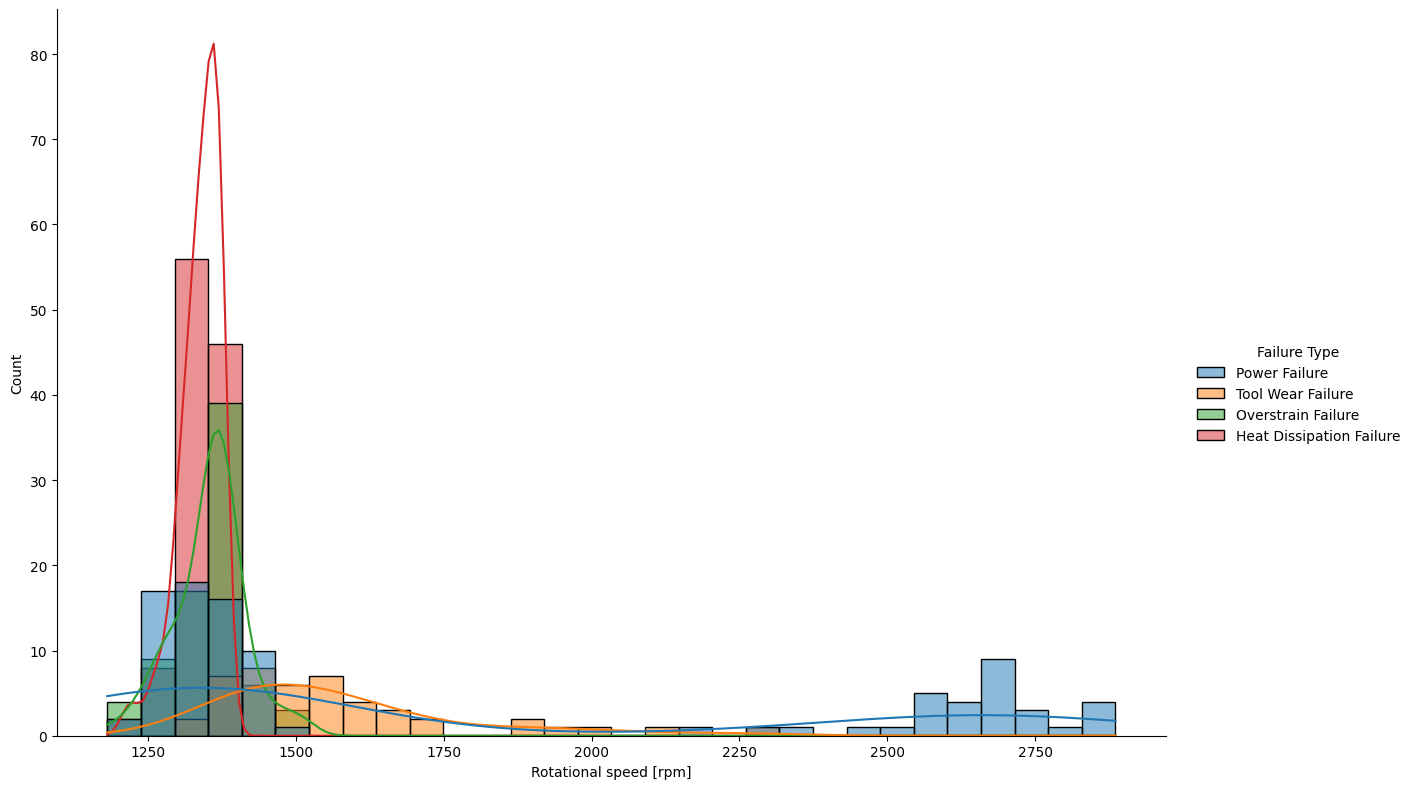

In [26]:
sns.displot(data=df_fail, x="Rotational speed [rpm]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

## The distribution of RPM when failure occue is as follows

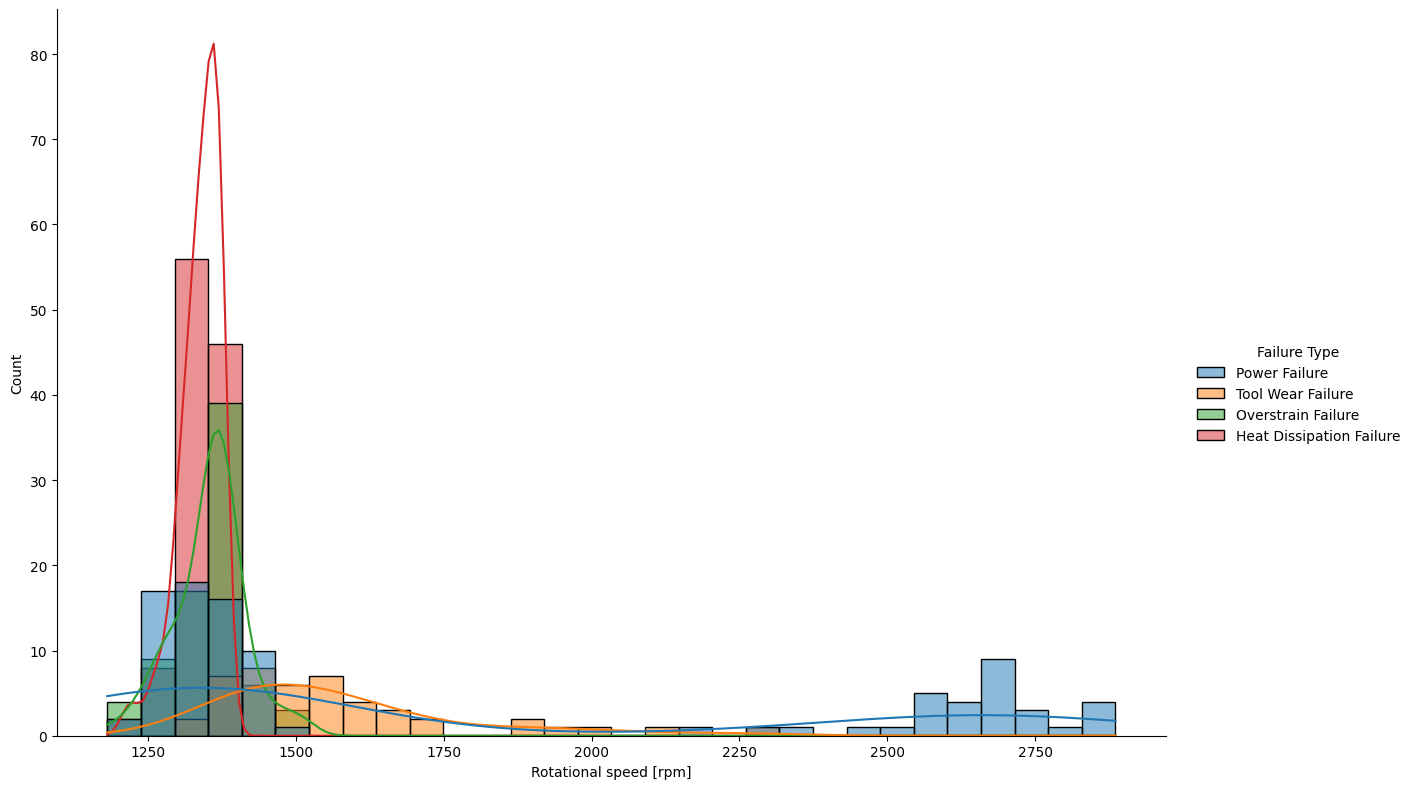

In [27]:
sns.displot(data=df_fail, x="Rotational speed [rpm]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

## Lets see the plot of RPM and torque

<AxesSubplot:xlabel='Rotational speed [rpm]', ylabel='Torque [Nm]'>

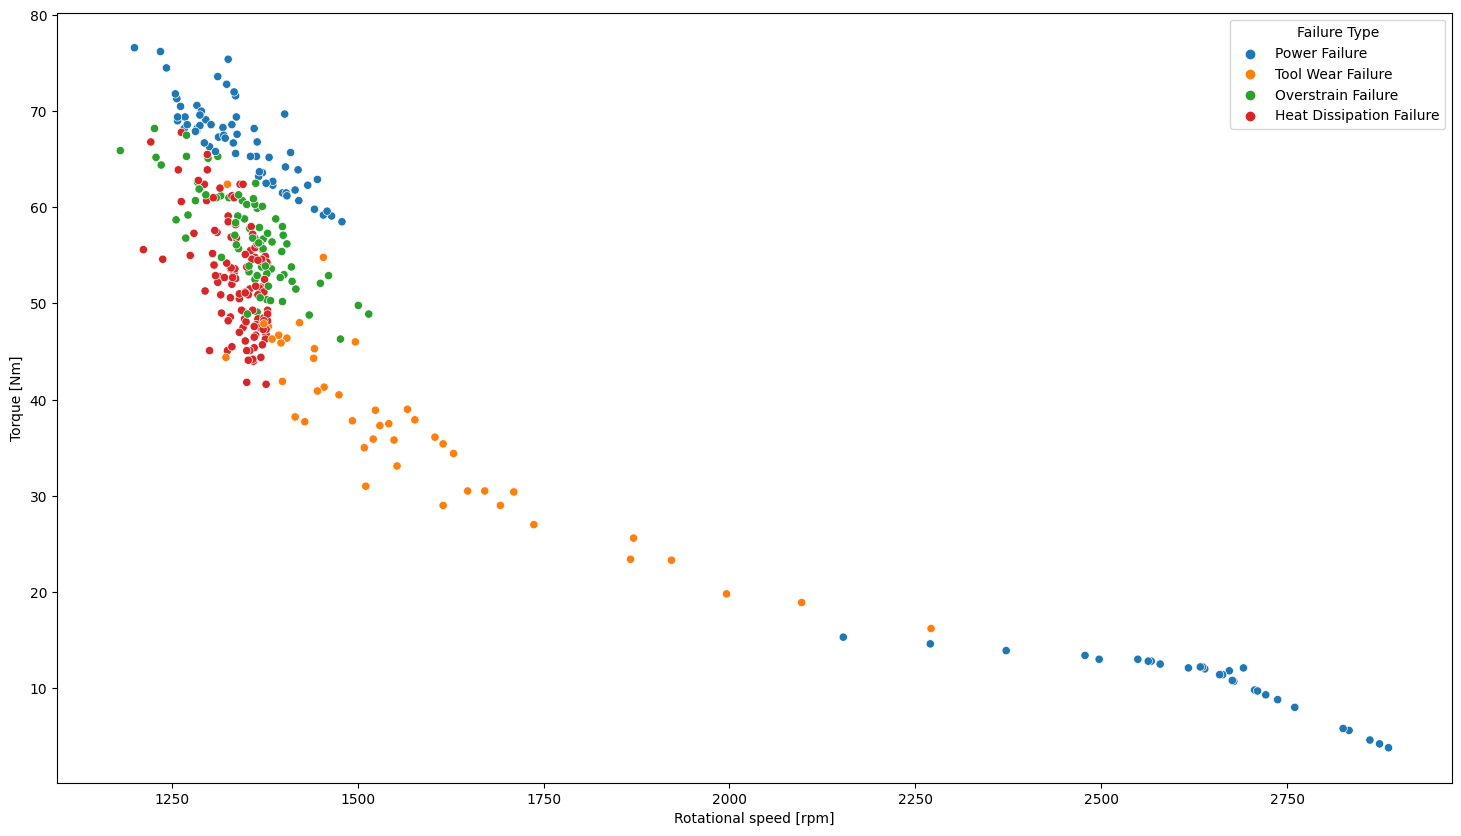

In [28]:

plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="Rotational speed [rpm]",y='Torque [Nm]',hue="Failure Type")

In [29]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'td',
       'Process_temp_normalized', 'Air_temp_normalized', 'Temp_diff'],
      dtype='object')

<AxesSubplot:xlabel='Tool wear [min]', ylabel='td'>

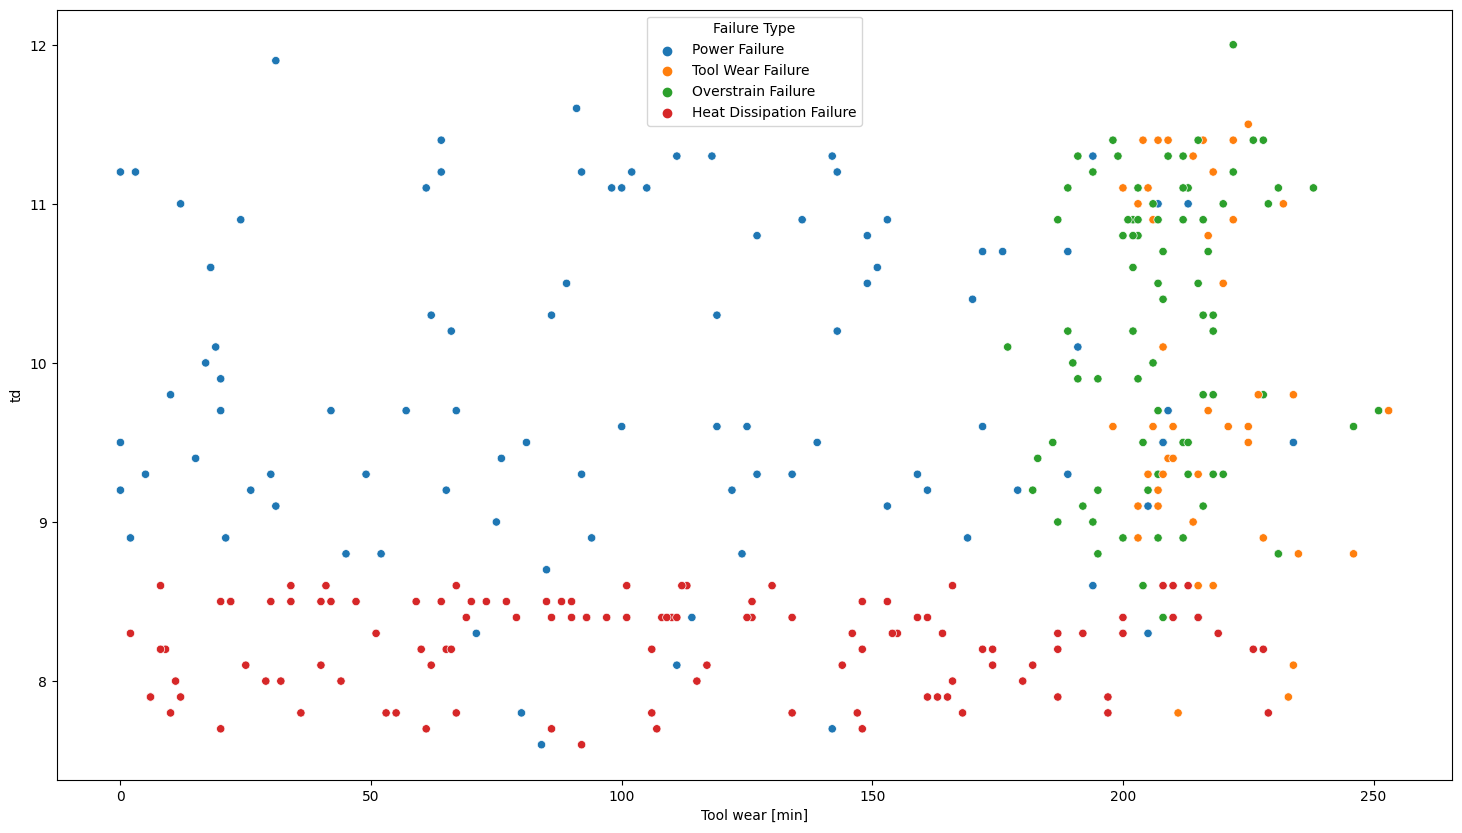

In [30]:

plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="Tool wear [min]", y='td',hue="Failure Type")

In [31]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'td',
       'Process_temp_normalized', 'Air_temp_normalized', 'Temp_diff'],
      dtype='object')

## The distribution of tool wear is as follows

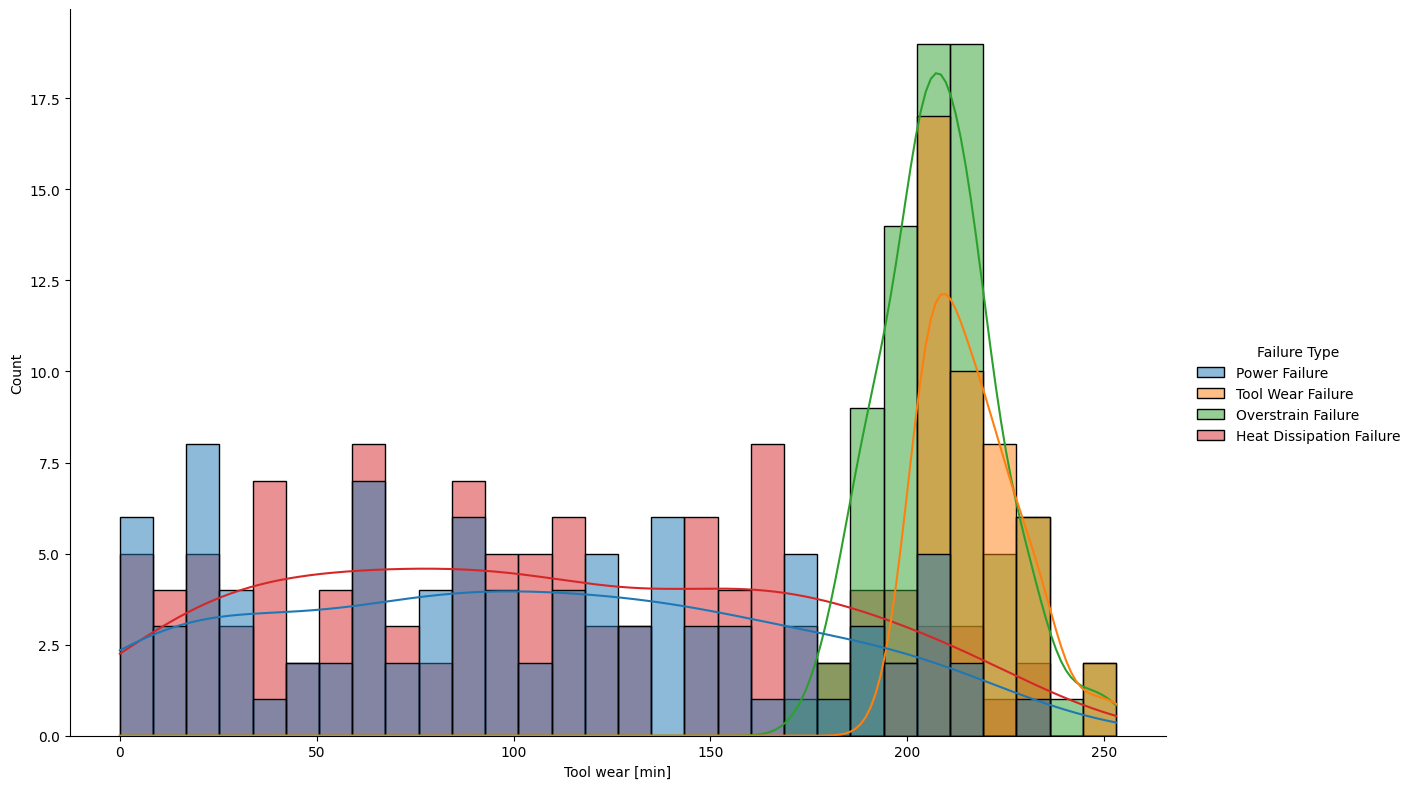

In [32]:
sns.displot(data=df_fail, x="Tool wear [min]",hue="Failure Type", kde=True, bins = 30,height = 8, aspect =1.5)

#### It is clearly evident that failures like Overstrain failure and tool wear failure are very dependent on tool wear 

## The plot of  rpm  wrt tool wear is as follows

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Rotational speed [rpm]'>

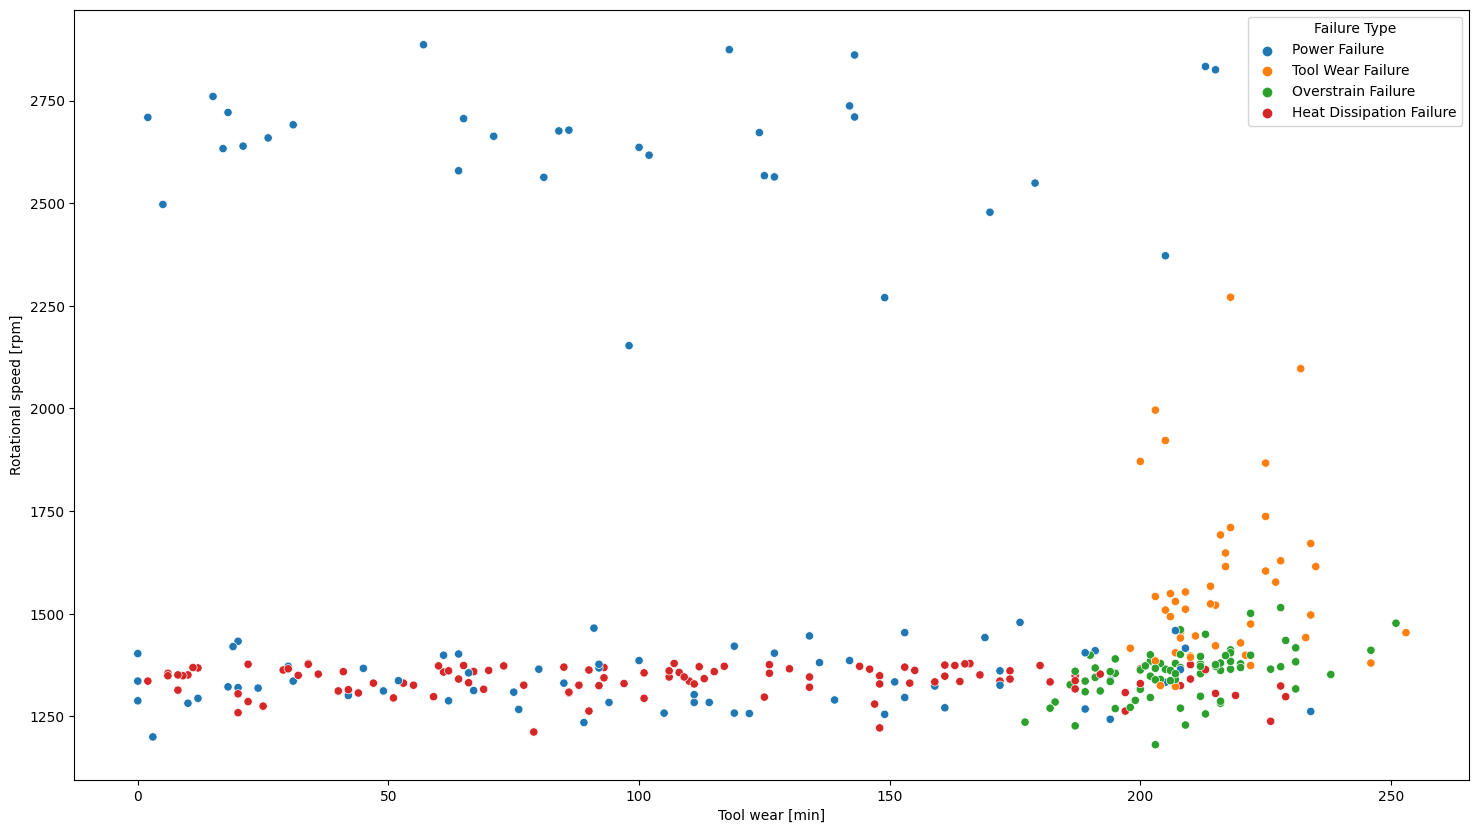

In [33]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="Tool wear [min]",y='Rotational speed [rpm]',hue="Failure Type")

#### Here is something interesting the heat dessipation failure only occured when the RPM was below 1500 and it seems to be independent of tool wear

## The plot of tool wear and torque is as follows

<AxesSubplot:xlabel='Tool wear [min]', ylabel='Torque [Nm]'>

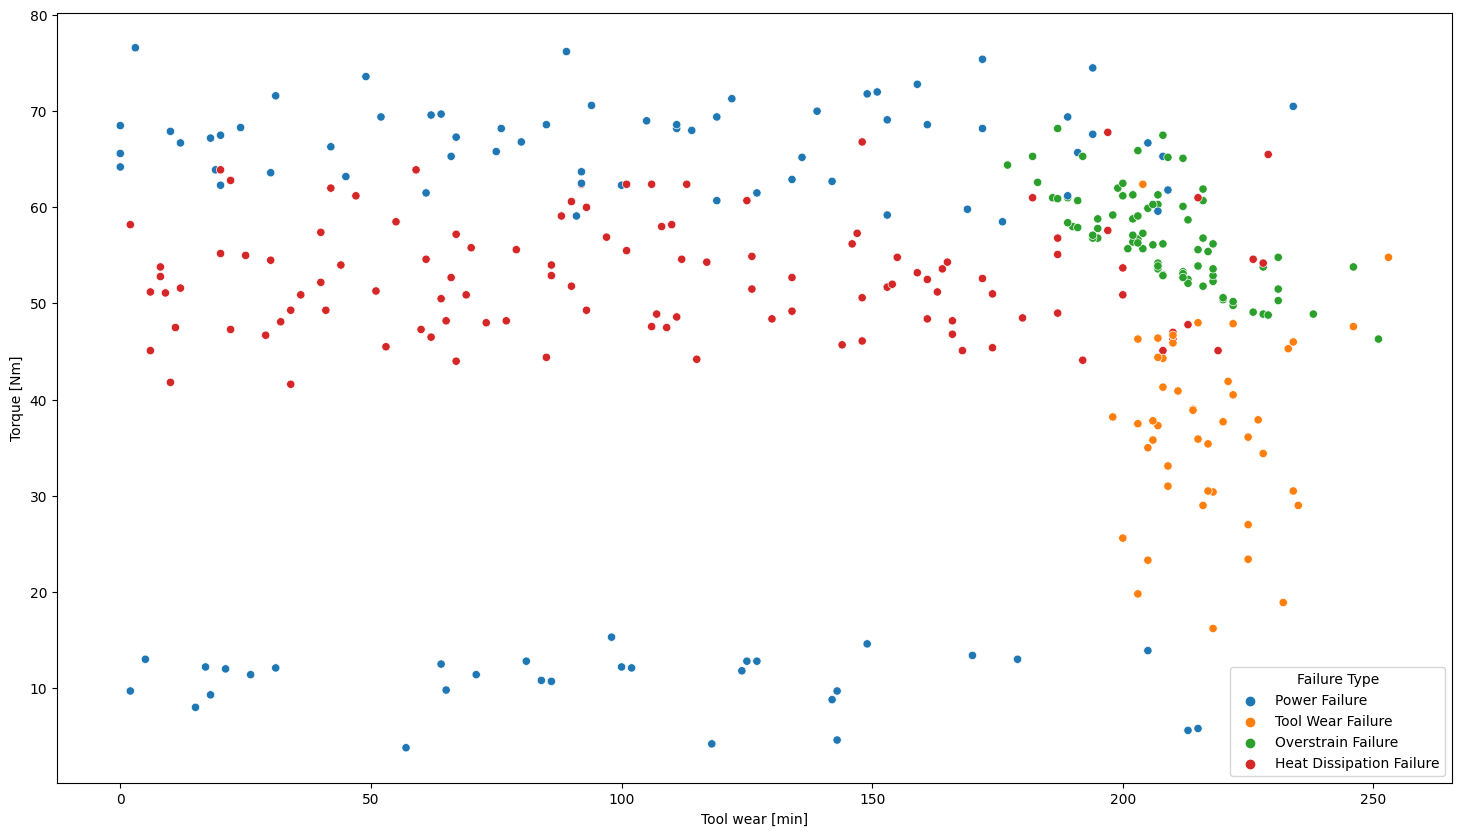

In [34]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="Tool wear [min]",y='Torque [Nm]',hue="Failure Type")

## The plor of temperature difference and rpm is as follows

<AxesSubplot:xlabel='td', ylabel='Rotational speed [rpm]'>

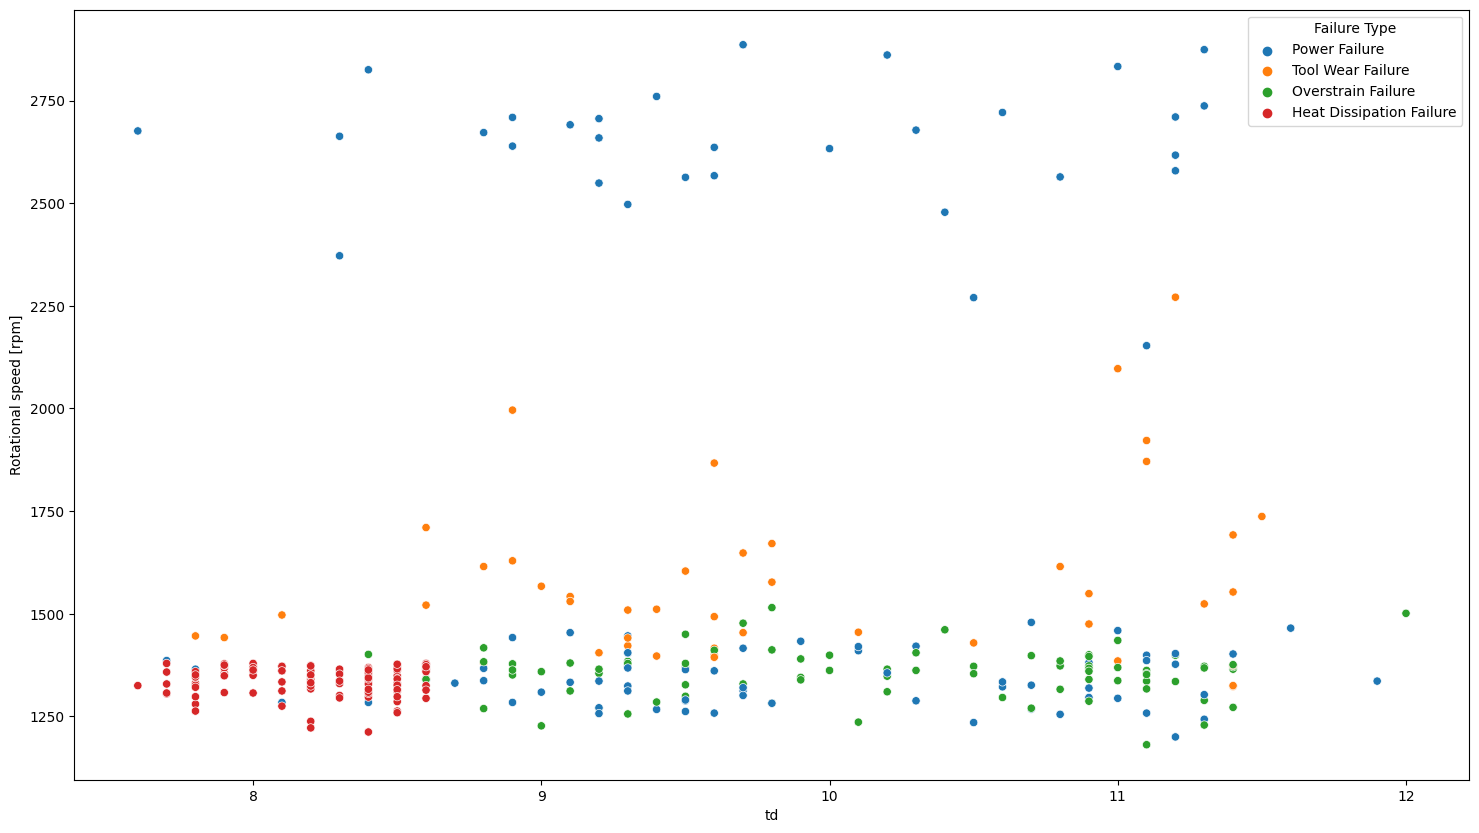

In [35]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="td",y='Rotational speed [rpm]',hue="Failure Type")

## The plot of torque wrt temperarture difference is as follows

<AxesSubplot:xlabel='td', ylabel='Torque [Nm]'>

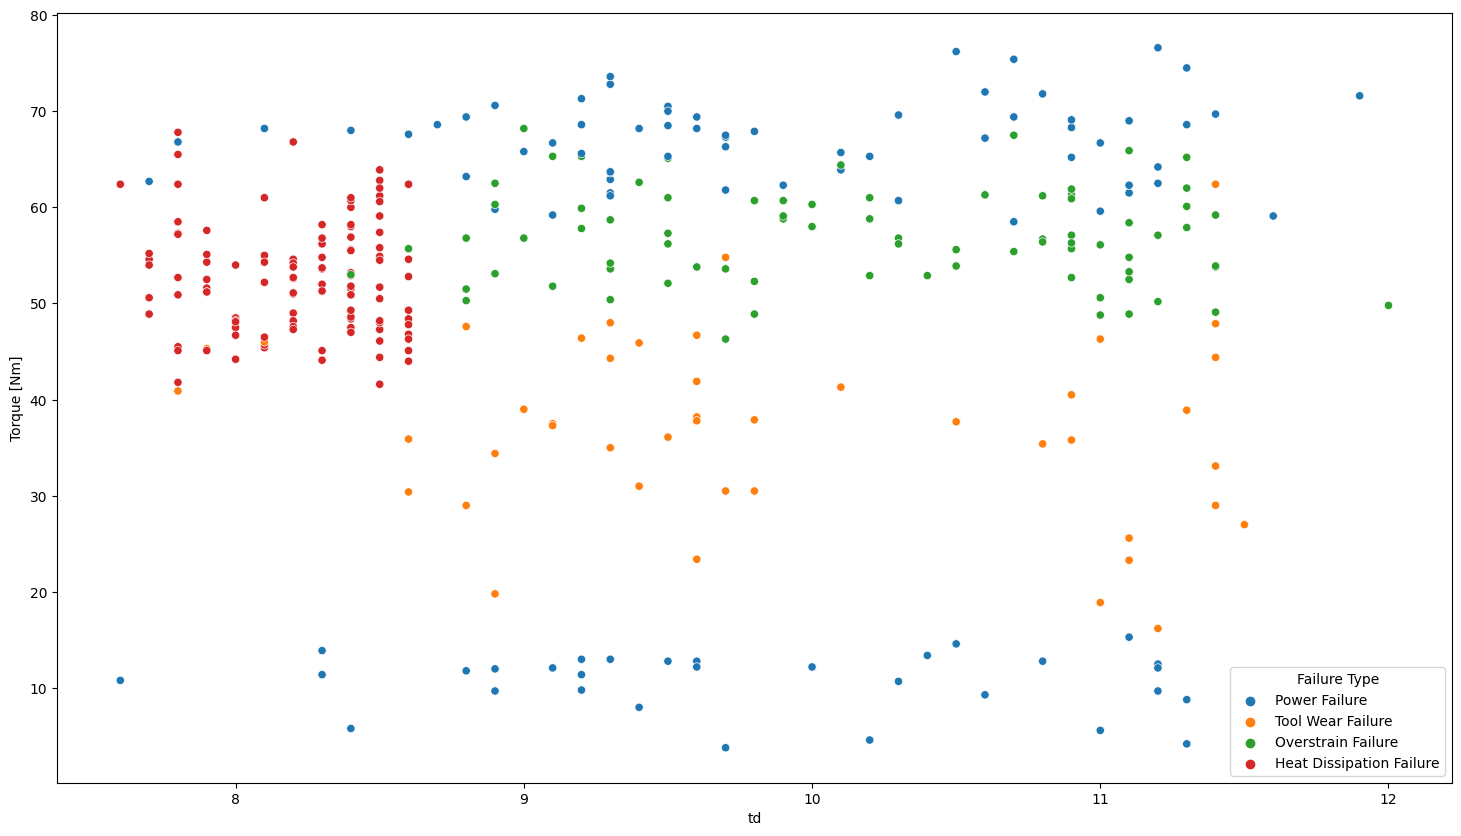

In [36]:
plt.figure(figsize=(18,10))
sns.scatterplot(data=df_fail,x="td",y='Torque [Nm]',hue="Failure Type")

In [37]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Target', 'Failure Type', 'td',
       'Process_temp_normalized', 'Air_temp_normalized', 'Temp_diff'],
      dtype='object')

## Summarizing the results of all the plots above 
#### 1. Heat dessipation failure occurs at lower RPM and higher torque when the temperature difference is less, meaning it occurs more frequently when the machine is starting 
#### 2.Tool wearing failure occurs mostly when the tool wear min is high, it is indipendent of rpm and torque 
#### 3. Over strain failure happnes at higher torque and lower RPM but unlike heat dessipation failure, they are indipendent of temperature difference but they need high tool wear min similar to tool wearing failure
#### 4. Power failures either occur at high torque low rpm or high rpm low torque 

## Moving forward to training I'll be making two svm based classifires 1 for predicting the type of failure this classisier assums that a failure has occured and other one to determine if a failure occured or not

#### Starting with categorizing the type of failure

#### I have used the min-max normalization to normalize all variable i.e rpm , torque, temperature, tool wear 

In [38]:
df_pass=df[df['Target']==0]
df_pass=df_pass[df_pass['Failure Type']=='No Failure']
df_fail=df
df_fail=df_fail

In [39]:
df_fail['rpm_norm']=(df_fail['Rotational speed [rpm]']-min(df_fail['Rotational speed [rpm]']))/(max(df_fail['Rotational speed [rpm]'])-min(df_fail['Rotational speed [rpm]']))

In [40]:
df_fail['Torque_norm']=(df_fail['Torque [Nm]']-min(df_fail['Torque [Nm]']))/(max(df_fail['Torque [Nm]'])-min(df_fail['Torque [Nm]']))
df_fail['Tool_norm']=(df_fail['Tool wear [min]']-min(df_fail['Tool wear [min]']))/(max(df_fail['Tool wear [min]'])-min(df_fail['Tool wear [min]']))


In [41]:

df_fail=df_fail.drop(columns=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Product ID','UDI','Temp_diff','td','Target'])

#### Encoding the data

In [42]:
df_fail = pd.get_dummies(data=df_fail, columns=['Type'],drop_first=True)

scaler = LabelEncoder()
df_fail['Failure Type'] = scaler.fit_transform(df_fail['Failure Type'])

#### Splitting train and target

In [43]:
scaler.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [44]:
df_fail.value_counts("Failure Type")

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
dtype: int64

In [45]:
df_fail

,Failure Type,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
0,1,0.151351,0.151351,0.222934,0.535714,0.000000,0,1
1,1,0.156757,0.156757,0.139697,0.583791,0.011858,1,0
2,1,0.151351,0.151351,0.192084,0.626374,0.019763,1,0
3,1,0.156757,0.156757,0.154249,0.490385,0.027668,1,0
4,1,0.156757,0.156757,0.139697,0.497253,0.035573,1,0
...,...,...,...,...,...,...,...,...
9995,1,0.189189,0.189189,0.253783,0.353022,0.055336,0,1
9996,1,0.194595,0.194595,0.270081,0.384615,0.067194,0,0
9997,1,0.200000,0.200000,0.277648,0.406593,0.086957,0,1
9998,1,0.200000,0.200000,0.139697,0.614011,0.098814,0,0


In [46]:
df_fail_targ=df_fail_train=df_fail.iloc[:,0]
df_fail_train=df_fail.iloc[:,1:]

In [47]:
df_fail.value_counts("Failure Type")

Failure Type
1    9652
0     112
3      95
2      78
5      45
4      18
dtype: int64

In [48]:
df_fail_train.describe()

,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.254321,0.254321,0.215818,0.497073,0.426684,0.600000,0.299700
std,0.108122,0.108122,0.104356,0.136936,0.251597,0.489922,0.458149
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.162162,0.162162,0.148428,0.403846,0.209486,0.000000,0.000000
50%,0.259459,0.259459,0.194994,0.498626,0.426877,1.000000,0.000000
75%,0.335135,0.335135,0.258440,0.590659,0.640316,1.000000,1.000000
max,0.497297,0.497297,1.000000,1.000000,1.000000,1.000000,1.000000


In [49]:
df_fail_targ

0       1
1       1
2       1
3       1
4       1
       ..
9995    1
9996    1
9997    1
9998    1
9999    1
Name: Failure Type, Length: 10000, dtype: int32

#### Splitting the train and validation 

In [50]:
X_train,X_test,y_train,y_test = train_test_split(df_fail_train,df_fail_targ,test_size=0.2,random_state=21)

In [51]:
X_train

,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
5504,0.405405,0.405405,0.168801,0.648352,0.166008,1,0
5307,0.470270,0.470270,0.210710,0.425824,0.833992,1,0
1684,0.135135,0.135135,0.157159,0.559066,0.011858,1,0
2441,0.205405,0.205405,0.295693,0.373626,0.272727,1,0
0,0.151351,0.151351,0.222934,0.535714,0.000000,0,1
...,...,...,...,...,...,...,...
9336,0.172973,0.172973,0.324214,0.385989,0.810277,1,0
48,0.189189,0.189189,0.149593,0.688187,0.533597,0,0
8964,0.102703,0.102703,0.167637,0.564560,0.335968,0,1
5944,0.291892,0.291892,0.183935,0.469780,0.332016,0,1


#### Training and predicting the results

In [52]:

svc = LogisticRegression( solver="saga", max_iter=200)

smk=SMOTE(random_state=42)
X_res, y_res = smk.fit_resample(X_train, y_train)
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")



NameError: name 'LogisticRegression' is not defined

C:\Users\tadpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


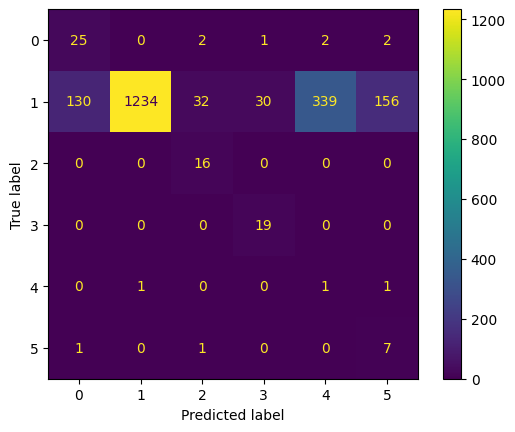

In [ ]:
plot_confusion_matrix(svc, X_test, y_test)

## Moving forward to failure or not failure classifier

#### Starting with the normalization

Training Accuracy    : 96.6 %
Model Accuracy Score : 96.1 %


C:\Users\tadpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


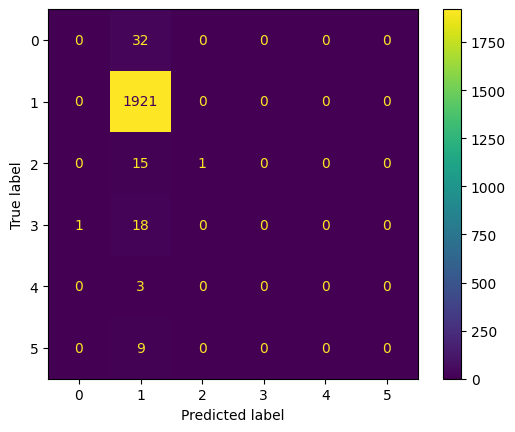

In [ ]:

svc = LogisticRegression( solver="saga", max_iter=200)

X_res, y_res = X_train, y_train
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")
plot_confusion_matrix(svc, X_test, y_test)


In [ ]:
scaler.classes_

array(['Heat Dissipation Failure', 'No Failure', 'Overstrain Failure',
       'Power Failure', 'Random Failures', 'Tool Wear Failure'],
      dtype=object)

In [53]:

svc = LogisticRegression( class_weight = {1:0.03/0.97, 0:3, 2:4, 3:3, 4:10, 5:8}, solver="saga", max_iter=200)
X_res, y_res = X_train, y_train
svc.fit(X_res, y_res)
y_pred = svc.predict(X_test)

train_acc = round(svc.score(X_train, y_train) * 100, 1)
val_acc = round(accuracy_score(y_pred, y_test) * 100, 2)

print("Training Accuracy    :",train_acc ,"%")
print("Model Accuracy Score :",val_acc ,"%")
plot_confusion_matrix(svc, X_test, y_test)


NameError: name 'LogisticRegression' is not defined

In [ ]:
df['rpm_norm']=(df['Rotational speed [rpm]']-min(df['Rotational speed [rpm]']))/(max(df['Rotational speed [rpm]'])-min(df['Rotational speed [rpm]']))
df['Torque_norm']=(df['Torque [Nm]']-min(df['Torque [Nm]']))/(max(df['Torque [Nm]'])-min(df['Torque [Nm]']))
df['Tool_norm']=(df['Tool wear [min]']-min(df['Tool wear [min]']))/(max(df['Tool wear [min]'])-min(df['Tool wear [min]']))


#### Dropping the unnecessary

In [54]:

df2=df.drop(columns=['Air temperature [K]','Process temperature [K]','Rotational speed [rpm]','Torque [Nm]','Tool wear [min]','Product ID','UDI','Temp_diff','td','Failure Type'])

In [55]:
df2

,Type,Target,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm
0,M,0,0.151351,0.151351,0.222934,0.535714,0.000000
1,L,0,0.156757,0.156757,0.139697,0.583791,0.011858
2,L,0,0.151351,0.151351,0.192084,0.626374,0.019763
3,L,0,0.156757,0.156757,0.154249,0.490385,0.027668
4,L,0,0.156757,0.156757,0.139697,0.497253,0.035573
...,...,...,...,...,...,...,...
9995,M,0,0.189189,0.189189,0.253783,0.353022,0.055336
9996,H,0,0.194595,0.194595,0.270081,0.384615,0.067194
9997,M,0,0.200000,0.200000,0.277648,0.406593,0.086957
9998,H,0,0.200000,0.200000,0.139697,0.614011,0.098814


#### Encoding the type feature

In [56]:
df2 = pd.get_dummies(data=df2, columns=['Type'],drop_first=True)
df2

,Target,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
0,0,0.151351,0.151351,0.222934,0.535714,0.000000,0,1
1,0,0.156757,0.156757,0.139697,0.583791,0.011858,1,0
2,0,0.151351,0.151351,0.192084,0.626374,0.019763,1,0
3,0,0.156757,0.156757,0.154249,0.490385,0.027668,1,0
4,0,0.156757,0.156757,0.139697,0.497253,0.035573,1,0
...,...,...,...,...,...,...,...,...
9995,0,0.189189,0.189189,0.253783,0.353022,0.055336,0,1
9996,0,0.194595,0.194595,0.270081,0.384615,0.067194,0,0
9997,0,0.200000,0.200000,0.277648,0.406593,0.086957,0,1
9998,0,0.200000,0.200000,0.139697,0.614011,0.098814,0,0


In [57]:
df2[(df2["Type_L"]==0) & (df2["Type_M"] == 0)]

,Target,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
10,0,0.167568,0.167568,0.357392,0.276099,0.094862,0,0
11,0,0.178378,0.178378,0.148428,0.556319,0.114625,0,0
18,0,0.189189,0.189189,0.080326,0.696429,0.197628,0,0
20,0,0.194595,0.194595,0.120489,0.534341,0.229249,0,0
27,0,0.205405,0.205405,0.374272,0.285714,0.304348,0,0
...,...,...,...,...,...,...,...,...
9978,0,0.178378,0.178378,0.121653,0.663462,0.715415,0,0
9984,0,0.183784,0.183784,0.153667,0.535714,0.778656,0,0
9985,0,0.183784,0.183784,0.235157,0.436813,0.798419,0,0
9996,0,0.194595,0.194595,0.270081,0.384615,0.067194,0,0


<AxesSubplot:>

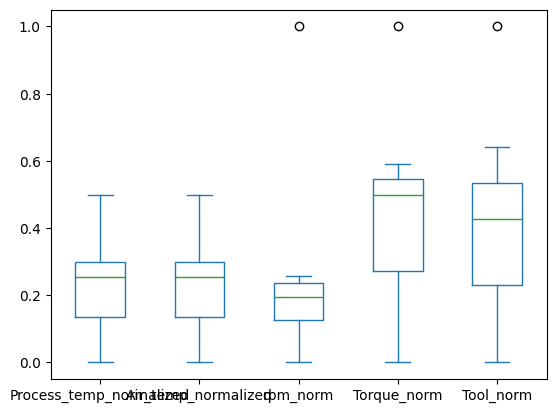

In [58]:
train=df2.iloc[:,1:]
train.describe().iloc[1:,:-2].plot(kind="box",)

In [59]:
df2.iloc[:,:]

,Target,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
0,0,0.151351,0.151351,0.222934,0.535714,0.000000,0,1
1,0,0.156757,0.156757,0.139697,0.583791,0.011858,1,0
2,0,0.151351,0.151351,0.192084,0.626374,0.019763,1,0
3,0,0.156757,0.156757,0.154249,0.490385,0.027668,1,0
4,0,0.156757,0.156757,0.139697,0.497253,0.035573,1,0
...,...,...,...,...,...,...,...,...
9995,0,0.189189,0.189189,0.253783,0.353022,0.055336,0,1
9996,0,0.194595,0.194595,0.270081,0.384615,0.067194,0,0
9997,0,0.200000,0.200000,0.277648,0.406593,0.086957,0,1
9998,0,0.200000,0.200000,0.139697,0.614011,0.098814,0,0


In [60]:
df2.iloc[:,:].melt(id_vars=["Target"])

,Target,variable,value
0,0,Process_temp_normalized,0.151351
1,0,Process_temp_normalized,0.156757
2,0,Process_temp_normalized,0.151351
3,0,Process_temp_normalized,0.156757
4,0,Process_temp_normalized,0.156757
...,...,...,...
69995,0,Type_M,1.000000
69996,0,Type_M,0.000000
69997,0,Type_M,1.000000
69998,0,Type_M,0.000000


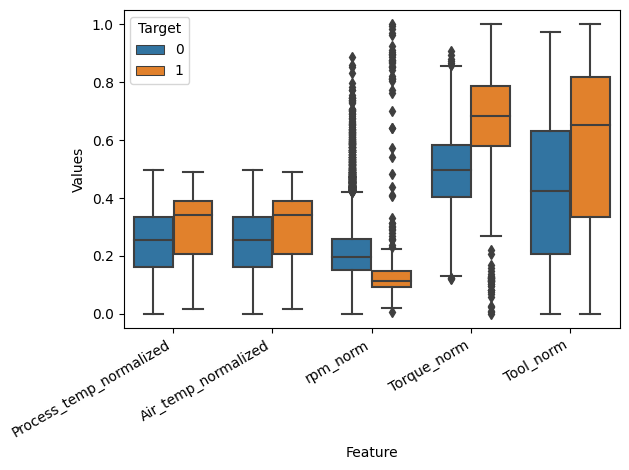

In [61]:
ax = sns.boxplot(
    data=df2.iloc[:,:-2].melt(id_vars=["Target"],var_name="Feature", value_name="Values"),
    x='Feature',
    y='Values',
    hue="Target",
)
ax.set_xticklabels(ax.get_xticklabels(), rotation=30, ha="right")
plt.tight_layout()
plt.savefig("boxplot",dpi=300)

In [62]:
tar=df2.iloc[:,0]
tar.value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [63]:
df2

,Target,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
0,0,0.151351,0.151351,0.222934,0.535714,0.000000,0,1
1,0,0.156757,0.156757,0.139697,0.583791,0.011858,1,0
2,0,0.151351,0.151351,0.192084,0.626374,0.019763,1,0
3,0,0.156757,0.156757,0.154249,0.490385,0.027668,1,0
4,0,0.156757,0.156757,0.139697,0.497253,0.035573,1,0
...,...,...,...,...,...,...,...,...
9995,0,0.189189,0.189189,0.253783,0.353022,0.055336,0,1
9996,0,0.194595,0.194595,0.270081,0.384615,0.067194,0,0
9997,0,0.200000,0.200000,0.277648,0.406593,0.086957,0,1
9998,0,0.200000,0.200000,0.139697,0.614011,0.098814,0,0


In [64]:
X=df2.iloc[:,1:].to_numpy()

In [65]:
y=df2.iloc[:,0]
y.value_counts()

0    9661
1     339
Name: Target, dtype: int64

In [66]:
X

array([[0.15135135, 0.15135135, 0.22293364, ..., 0.        , 0.        ,
        1.        ],
       [0.15675676, 0.15675676, 0.13969732, ..., 0.01185771, 1.        ,
        0.        ],
       [0.15135135, 0.15135135, 0.19208382, ..., 0.01976285, 1.        ,
        0.        ],
       ...,
       [0.2       , 0.2       , 0.27764843, ..., 0.08695652, 0.        ,
        1.        ],
       [0.2       , 0.2       , 0.13969732, ..., 0.09881423, 0.        ,
        0.        ],
       [0.2       , 0.2       , 0.19324796, ..., 0.11857708, 0.        ,
        1.        ]])

In [67]:
y

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

In [68]:
train

,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
0,0.151351,0.151351,0.222934,0.535714,0.000000,0,1
1,0.156757,0.156757,0.139697,0.583791,0.011858,1,0
2,0.151351,0.151351,0.192084,0.626374,0.019763,1,0
3,0.156757,0.156757,0.154249,0.490385,0.027668,1,0
4,0.156757,0.156757,0.139697,0.497253,0.035573,1,0
...,...,...,...,...,...,...,...
9995,0.189189,0.189189,0.253783,0.353022,0.055336,0,1
9996,0.194595,0.194595,0.270081,0.384615,0.067194,0,0
9997,0.200000,0.200000,0.277648,0.406593,0.086957,0,1
9998,0.200000,0.200000,0.139697,0.614011,0.098814,0,0


In [69]:
tar

0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: Target, Length: 10000, dtype: int64

##### Splitting into train and validation

In [70]:
X_train2,X_test2,y_train2,y_test2 = train_test_split(train,tar,test_size=0.2,random_state=21)

#### Training and predicting

In [71]:
svc = LogisticRegression( solver="saga", max_iter=200)
svc.fit(X_train2, y_train2)
y_pred2 = svc.predict(X_test2)

train_acc2 = round(svc.score(X_train2, y_train2) * 100, 1)
val_acc2 = round(accuracy_score(y_pred2, y_test2) * 100, 2)

print("Training Accuracy:",train_acc2 ,"%")
print("Model Accuracy Score :",val_acc2 ,"%")
plot_confusion_matrix(svc, X_test2, y_test2)

NameError: name 'LogisticRegression' is not defined

In [ ]:
svc = LogisticRegression( class_weight={0:0.03/0.97, 1:1},solver="saga", max_iter=200)
svc.fit(X_train2, y_train2)
y_pred2 = svc.predict(X_test2)

train_acc2 = round(svc.score(X_train2, y_train2) * 100, 1)
val_acc2 = round(accuracy_score(y_pred2, y_test2) * 100, 2)

print("Training Accuracy:",train_acc2 ,"%")
print("Model Accuracy Score :",val_acc2 ,"%")
plot_confusion_matrix(svc, X_test2, y_test2)

In [73]:
y_test2

3644    0
1828    0
6661    0
9216    0
5911    0
       ..
1790    0
7512    0
3144    0
6231    0
9448    0
Name: Target, Length: 2000, dtype: int64

In [82]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, make_scorer, ConfusionMatrixDisplay, balanced_accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve, RocCurveDisplay, auc, precision_recall_curve, PrecisionRecallDisplay, plot_precision_recall_curve
from imblearn.metrics import geometric_mean_score
from imblearn.pipeline import Pipeline, make_pipeline
import matplotlib.lines as mlines
from sklearn.metrics import precision_recall_curve

In [76]:
SEED = 10
from tqdm import tqdm
dimensions = [2]
from scipy import interp
smote = SMOTE()
n_mean_auc = [[], [], []]
clf = LogisticRegression()
cs_clf = LogisticRegression(class_weight={0:0.03/0.97,1:1})
clf_sm = LogisticRegression()
method = ["Original", "Cost-Sensitive", "SMOTE"]
df_template = {"N-Feature":list(), "Ratio":list(), "AUC":list(), "Method":list()}
X=df2.iloc[:,1:].to_numpy()
y=df2.iloc[:,0].to_numpy()
for n in tqdm(dimensions):
    aucs = [[], [], []]
    matrix = [np.zeros((2,2)), np.zeros((2,2)), np.zeros((2,2))]
    for s in (range(SEED)):
        cv = StratifiedKFold(n_splits=10,random_state=s, shuffle=True)
       
        tprs = [[],[],[]]
        aucsz = [[],[],[]]
        mean_fpr = np.linspace(0,1,100)
        i = 1

        for train,test in cv.split(X,y):
            X_smote, y_smote = smote.fit_resample(X[train], y[train])
            models = [clf.fit(X[train], y[train]), cs_clf.fit(X[train], y[train]), clf_sm.fit(X_smote, y_smote)]

            for m in range(len(models)):
                proba = models[m].predict_proba(X[test])
                matrix[m] += confusion_matrix(y[test], models[m].predict(X[test]))
                fpr, tpr, thresholds = roc_curve(y[test], proba[:, 1])
                tprs[m].append(np.interp(mean_fpr, fpr, tpr))
                roc_auc = auc(fpr, tpr)
                aucsz[m].append(roc_auc)
                #aucs[m].append(np.round(auc(fpr, tpr), 2))
                
        for m in range(3) :
            mean_tpr = np.mean(tprs[m], axis=0)
            mean_auc = auc(mean_fpr, mean_tpr)        
            aucs[m].append(mean_auc)
            df_template["N-Feature"].append(n)
            df_template["Ratio"].append(0.9)
            df_template["AUC"].append(np.round(mean_auc,2))
            df_template["Method"].append(method[m])
    mean_auc = np.mean(aucs, axis=1)
    n_mean_auc[0].append(mean_auc[0])
    n_mean_auc[1].append(mean_auc[1])
    n_mean_auc[2].append(mean_auc[2])


100%|██████████| 1/1 [00:17<00:00, 17.95s/it]


In [81]:
np.round(np.array(matrix[3])/10).astype(int)

IndexError: list index out of range

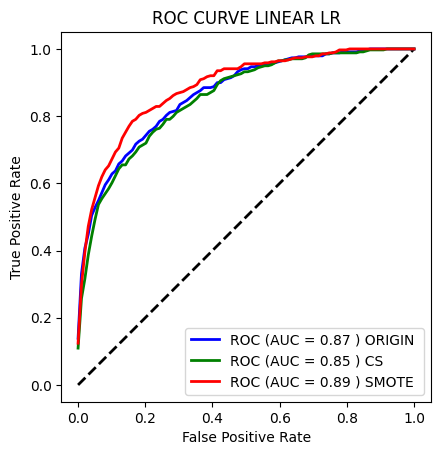

In [78]:
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs[0], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'ROC (AUC = %0.2f ) ORIGIN ' % (mean_auc),lw=2, alpha=1)

mean_tpr = np.mean(tprs[1], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='green',
         label=r'ROC (AUC = %0.2f ) CS' % (mean_auc),lw=2, alpha=1)

mean_tpr = np.mean(tprs[2], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'ROC (AUC = %0.2f ) SMOTE' % (mean_auc),lw=2, alpha=1)



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE LINEAR LR')
plt.gca().set_aspect('equal')
plt.legend(loc="lower right")
plt.savefig("ROC CURVE", dpi=300)
plt.show()



In [85]:
SEED = 10
from scipy import integrate
from tqdm import tqdm
dimensions = [2]
from scipy import interp
smote = SMOTE()
n_mean_auc = [[], [], []]
clf = LogisticRegression()
cs_clf = LogisticRegression(class_weight={0:0.03/0.97,1:1})
clf_sm = LogisticRegression()
method = ["Original", "Cost-Sensitive", "SMOTE"]
df_template = {"N-Feature":list(), "Ratio":list(), "AUC":list(), "Method":list()}
X=df2.iloc[:,1:].to_numpy()
y=df2.iloc[:,0].to_numpy()
for n in tqdm(dimensions):
    aucs = [[], [], []]
    matrix = [np.zeros((2,2)), np.zeros((2,2)), np.zeros((2,2))]
    for s in (range(SEED)):
        cv = StratifiedKFold(n_splits=10,random_state=s, shuffle=True)
       
        tprs = [[],[],[]]
        aucsz = [[],[],[]]
        mean_fpr = np.linspace(0,1,100)
        i = 1

        for train,test in cv.split(X,y):
            X_smote, y_smote = smote.fit_resample(X[train], y[train])
            models = [clf.fit(X[train], y[train]), cs_clf.fit(X[train], y[train]), clf_sm.fit(X_smote, y_smote)]

            for m in range(len(models)):
                proba = models[m].predict_proba(X[test])
                matrix[m] += confusion_matrix(y[test], models[m].predict(X[test]))
                fpr, tpr, thresholds = precision_recall_curve(y[test], proba[:, 1])
                tprs[m].append(np.interp(mean_fpr, fpr, tpr))
                sorted_index = np.argsort(fpr)
                fpr_list_sorted =  np.array(fpr)[sorted_index]
                tpr_list_sorted = np.array(tpr)[sorted_index]
                roc_auc = integrate.trapz(y=tpr_list_sorted, x=fpr_list_sorted)
                #roc_auc = auc(fpr, tpr)
                aucsz[m].append(roc_auc)
                #aucs[m].append(np.round(auc(fpr, tpr), 2))
                
        for m in range(3) :
            mean_tpr = np.mean(tprs[m], axis=0)
            mean_auc = auc(mean_fpr, mean_tpr)        
            aucs[m].append(mean_auc)
            df_template["N-Feature"].append(n)
            df_template["Ratio"].append(0.9)
            df_template["AUC"].append(np.round(mean_auc,2))
            df_template["Method"].append(method[m])
    mean_auc = np.mean(aucs, axis=1)
    n_mean_auc[0].append(mean_auc[0])
    n_mean_auc[1].append(mean_auc[1])
    n_mean_auc[2].append(mean_auc[2])


100%|██████████| 1/1 [00:16<00:00, 16.81s/it]


In [ ]:
np.round(np.array(matrix[3])/10).astype(int)

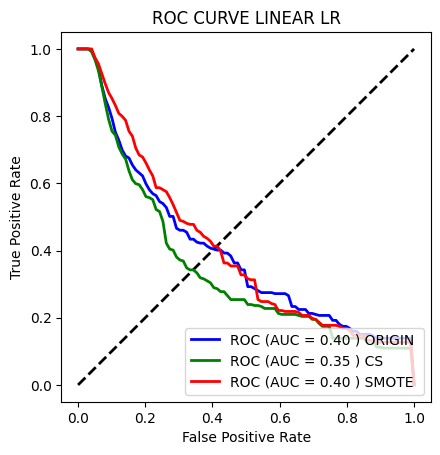

In [87]:
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs[0], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'ROC (AUC = %0.2f ) ORIGIN ' % (mean_auc),lw=2, alpha=1)

mean_tpr = np.mean(tprs[1], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='green',
         label=r'ROC (AUC = %0.2f ) CS' % (mean_auc),lw=2, alpha=1)

mean_tpr = np.mean(tprs[2], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'ROC (AUC = %0.2f ) SMOTE' % (mean_auc),lw=2, alpha=1)



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE LINEAR LR')
plt.gca().set_aspect('equal')
plt.legend(loc="lower right")
plt.savefig("ROC CURVE", dpi=300)
plt.show()



In [88]:
SEED = 10
from sklearn.ensemble import RandomForestClassifier
from scipy import integrate
from tqdm import tqdm
dimensions = [2]
from scipy import interp
smote = SMOTE()
n_mean_auc = [[], [], []]
clf = RandomForestClassifier()
cs_clf = RandomForestClassifier(class_weight={0:0.03/0.97,1:1})
clf_sm = RandomForestClassifier()
method = ["Original", "Cost-Sensitive", "SMOTE"]
df_template = {"N-Feature":list(), "Ratio":list(), "AUC":list(), "Method":list()}
X=df2.iloc[:,1:].to_numpy()
y=df2.iloc[:,0].to_numpy()
for n in tqdm(dimensions):
    aucs = [[], [], []]
    matrix = [np.zeros((2,2)), np.zeros((2,2)), np.zeros((2,2))]
    for s in (range(SEED)):
        cv = StratifiedKFold(n_splits=10,random_state=s, shuffle=True)
       
        tprs = [[],[],[]]
        aucsz = [[],[],[]]
        mean_fpr = np.linspace(0,1,100)
        i = 1

        for train,test in cv.split(X,y):
            X_smote, y_smote = smote.fit_resample(X[train], y[train])
            models = [clf.fit(X[train], y[train]), cs_clf.fit(X[train], y[train]), clf_sm.fit(X_smote, y_smote)]

            for m in range(len(models)):
                proba = models[m].predict_proba(X[test])
                matrix[m] += confusion_matrix(y[test], models[m].predict(X[test]))
                fpr, tpr, thresholds = precision_recall_curve(y[test], proba[:, 1])
                tprs[m].append(np.interp(mean_fpr, fpr, tpr))
                sorted_index = np.argsort(fpr)
                fpr_list_sorted =  np.array(fpr)[sorted_index]
                tpr_list_sorted = np.array(tpr)[sorted_index]
                roc_auc = integrate.trapz(y=tpr_list_sorted, x=fpr_list_sorted)
                #roc_auc = auc(fpr, tpr)
                aucsz[m].append(roc_auc)
                #aucs[m].append(np.round(auc(fpr, tpr), 2))
                
        for m in range(3) :
            mean_tpr = np.mean(tprs[m], axis=0)
            mean_auc = auc(mean_fpr, mean_tpr)        
            aucs[m].append(mean_auc)
            df_template["N-Feature"].append(n)
            df_template["Ratio"].append(0.9)
            df_template["AUC"].append(np.round(mean_auc,2))
            df_template["Method"].append(method[m])
    mean_auc = np.mean(aucs, axis=1)
    n_mean_auc[0].append(mean_auc[0])
    n_mean_auc[1].append(mean_auc[1])
    n_mean_auc[2].append(mean_auc[2])


100%|██████████| 1/1 [09:51<00:00, 591.05s/it]


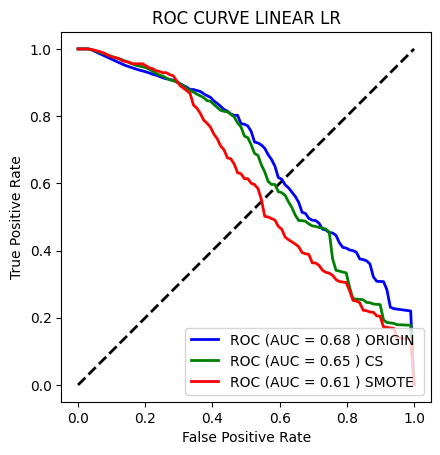

In [89]:
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs[0], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'ROC (AUC = %0.2f ) ORIGIN ' % (mean_auc),lw=2, alpha=1)

mean_tpr = np.mean(tprs[1], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='green',
         label=r'ROC (AUC = %0.2f ) CS' % (mean_auc),lw=2, alpha=1)

mean_tpr = np.mean(tprs[2], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'ROC (AUC = %0.2f ) SMOTE' % (mean_auc),lw=2, alpha=1)



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE LINEAR LR')
plt.gca().set_aspect('equal')
plt.legend(loc="lower right")
plt.savefig("ROC CURVE", dpi=300)
plt.show()



In [ ]:
SEED = 10
from sklearn.ensemble import RandomForestClassifier
from scipy import integrate
from tqdm import tqdm
dimensions = [2]
from scipy import interp
smote = SMOTE()
n_mean_auc = [[], [], []]
clf = RandomForestClassifier()
cs_clf = RandomForestClassifier(class_weight={0:0.03/0.97,1:1})
clf_sm = RandomForestClassifier()
method = ["Original", "Cost-Sensitive", "SMOTE"]
df_template = {"N-Feature":list(), "Ratio":list(), "AUC":list(), "Method":list()}
X=df2.iloc[:,1:].to_numpy()
y=df2.iloc[:,0].to_numpy()
for n in tqdm(dimensions):
    aucs = [[], [], []]
    matrix = [np.zeros((2,2)), np.zeros((2,2)), np.zeros((2,2))]
    for s in (range(SEED)):
        cv = StratifiedKFold(n_splits=10,random_state=s, shuffle=True)
       
        tprs = [[],[],[]]
        aucsz = [[],[],[]]
        mean_fpr = np.linspace(0,1,100)
        i = 1

        for train,test in cv.split(X,y):
            X_smote, y_smote = smote.fit_resample(X[train], y[train])
            models = [clf.fit(X[train], y[train]), cs_clf.fit(X[train], y[train]), clf_sm.fit(X_smote, y_smote)]

            for m in range(len(models)):
                proba = models[m].predict_proba(X[test])
                matrix[m] += confusion_matrix(y[test], models[m].predict(X[test]))
                fpr, tpr, thresholds = precision_recall_curve(y[test], proba[:, 1])
                tprs[m].append(np.interp(mean_fpr, fpr, tpr))
                sorted_index = np.argsort(fpr)
                fpr_list_sorted =  np.array(fpr)[sorted_index]
                tpr_list_sorted = np.array(tpr)[sorted_index]
                roc_auc = integrate.trapz(y=tpr_list_sorted, x=fpr_list_sorted)
                #roc_auc = auc(fpr, tpr)
                aucsz[m].append(roc_auc)
                #aucs[m].append(np.round(auc(fpr, tpr), 2))
                
        for m in range(3) :
            mean_tpr = np.mean(tprs[m], axis=0)
            mean_auc = auc(mean_fpr, mean_tpr)        
            aucs[m].append(mean_auc)
            df_template["N-Feature"].append(n)
            df_template["Ratio"].append(0.9)
            df_template["AUC"].append(np.round(mean_auc,2))
            df_template["Method"].append(method[m])
    mean_auc = np.mean(aucs, axis=1)
    n_mean_auc[0].append(mean_auc[0])
    n_mean_auc[1].append(mean_auc[1])
    n_mean_auc[2].append(mean_auc[2])


In [69]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

lr = LogisticRegression()
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
pipe = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

In [70]:
SEED = 200
from tqdm import tqdm
dimensions = [2]
from scipy import interp
smote = SMOTE()
n_mean_auc = [[], [], []]

lr = LogisticRegression(solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
clf = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

lr_cs = LogisticRegression(class_weight={0:0.03/0.97,1:1}, solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
cs_clf = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_cs)])

lr_sm = LogisticRegression(solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
clf_sm = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_sm)])


method = ["Original", "Cost-Sensitive", "SMOTE"]
df_template = {"N-Feature":list(), "Ratio":list(), "AUC":list(), "Method":list()}
X=df2.iloc[:,1:].to_numpy()
y=df2.iloc[:,0].to_numpy()
for n in tqdm(dimensions):
    aucs = [[], [], []]
    for s in (range(SEED)):
        cv = StratifiedKFold(n_splits=10,random_state=s, shuffle=True)
       
        tprs = [[],[],[]]
        aucsz = [[],[],[]]
        mean_fpr = np.linspace(0,1,100)
        i = 1

        for train,test in cv.split(X,y):
            X_smote, y_smote = smote.fit_resample(X[train], y[train])
            models = [clf.fit(X[train], y[train]), cs_clf.fit(X[train], y[train]), clf_sm.fit(X_smote, y_smote)]

            for m in range(len(models)):
                proba = models[m].predict_proba(X[test])
                fpr, tpr, thresholds = roc_curve(y[test], proba[:, 1])
                tprs[m].append(np.interp(mean_fpr, fpr, tpr))
                roc_auc = auc(fpr, tpr)
                aucsz[m].append(roc_auc)
                #aucs[m].append(np.round(auc(fpr, tpr), 2))
                
        for m in range(3) :
            mean_tpr = np.mean(tprs[m], axis=0)
            mean_auc = auc(mean_fpr, mean_tpr)        
            aucs[m].append(mean_auc)
            df_template["N-Feature"].append(n)
            df_template["Ratio"].append(0.9)
            df_template["AUC"].append(np.round(mean_auc,2))
            df_template["Method"].append(method[m])
    mean_auc = np.mean(aucs, axis=1)
    n_mean_auc[0].append(mean_auc[0])
    n_mean_auc[1].append(mean_auc[1])
    n_mean_auc[2].append(mean_auc[2])


100%|██████████| 1/1 [1:13:41<00:00, 4421.45s/it]


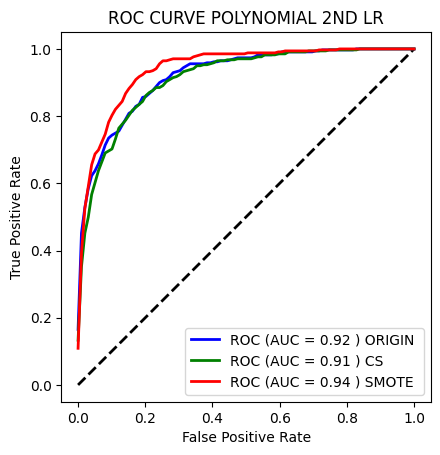

In [76]:
plt.plot([0,1],[0,1],linestyle = '--',lw = 2,color = 'black')
mean_tpr = np.mean(tprs[0], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='blue',
         label=r'ROC (AUC = %0.2f ) ORIGIN ' % (mean_auc),lw=2, alpha=1)

mean_tpr = np.mean(tprs[1], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='green',
         label=r'ROC (AUC = %0.2f ) CS' % (mean_auc),lw=2, alpha=1)

mean_tpr = np.mean(tprs[2], axis=0)
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, color='red',
         label=r'ROC (AUC = %0.2f ) SMOTE' % (mean_auc),lw=2, alpha=1)



plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE POLYNOMIAL 2ND LR')
plt.gca().set_aspect('equal')
plt.legend(loc="lower right")
plt.savefig("ROC CURVE", dpi=300)
plt.show()



In [79]:
def thresh_cv(thresh, X, y, cv):
    score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for train, test in cv.split(X, y):
        X_train = np.array([X[i] for i in train])
        X_test = np.array([X[i] for i in test])
        y_train = np.array([y[i] for i in train])
        y_test = np.array([y[i] for i in test])
        clf = LogisticRegression().fit(X_train, y_train)
        proba = clf.predict_proba(X_test)[:, 1]
        y_pred = np.where(proba > thresh, 1, 0)
        fpr, tpr, thresholds = roc_curve(y_test, proba)
        # print(y_test - y_pred)

        # Scoring
        score["Accuracy"].append(balanced_accuracy_score(y_test, y_pred))
        score["AUC"].append(auc(fpr, tpr))
        score["F1"].append(f1_score(y_test, y_pred))
        score["Precision"].append(precision_score(y_test, y_pred, zero_division=0))
        score["Recall"].append(recall_score(y_test, y_pred))
        score["G-mean"].append(geometric_mean_score(y_test, y_pred))
    return score

In [93]:
df_template = {"Classifier": ["LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression"],
            "Method" : ["0.02", "0.03", "0.1", "0.3", "0.5", "SMOTE", "Cost-Sensitive"],
            "Accuracy": [],
            "AUC": [],
            "F1": [],
            "Precision": [],
            "Recall": [],
            "G-mean" : []}


smote = SMOTE()
models = [LogisticRegression(),
          LogisticRegression(class_weight={0:0.03/0.97,1:1})]
for i in range(10):
    scoring = {"Accuracy":'balanced_accuracy', "AUC":'roc_auc', 
                    "F1":'f1', "Precision": 'precision', "Recall":'recall', "G-mean":make_scorer(geometric_mean_score)}
    cv = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
    X=df2.iloc[:,1:].to_numpy()
    y=df2.iloc[:,0].to_numpy()

    # Scoring
    thresh_1_cv_results = thresh_cv(0.02, X, y, cv)
    # thresh_1_cv_results = cross_validate(models[0], X, y, cv=cv, scoring=scoring)
    thresh_1_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_1_cv_results.keys()):
        thresh_1_score[test_metric].append(np.round(np.mean(thresh_1_cv_results[test_metric]), 2))
    
    thresh_2_cv_results = thresh_cv(0.03, X, y, cv)
    # thresh_2_cv_results = cross_validate(models[1], X, y, cv=cv, scoring=scoring)
    thresh_2_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_2_cv_results.keys()):
        thresh_2_score[test_metric].append(np.round(np.mean(thresh_2_cv_results[test_metric]), 2))
    
    thresh_3_cv_results = thresh_cv(0.1, X, y, cv)
    # thresh_3_cv_results = cross_validate(models[2], X, y, cv=cv, scoring=scoring)
    thresh_3_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_3_cv_results.keys()):
        thresh_3_score[test_metric].append(np.round(np.mean(thresh_3_cv_results[test_metric]), 2))
    
    thresh_4_cv_results = thresh_cv(0.3, X, y, cv)
    # thresh_4_cv_results = cross_validate(models[3], X, y, cv=cv, scoring=scoring)
    thresh_4_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_4_cv_results.keys()):
        thresh_4_score[test_metric].append(np.round(np.mean(thresh_4_cv_results[test_metric]), 2))
    
    thresh_5_cv_results = thresh_cv(0.5, X, y, cv)
    # thresh_5_cv_results = cross_validate(models[4], X, y, cv=cv, scoring=scoring)
    thresh_5_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_5_cv_results.keys()):
        thresh_5_score[test_metric].append(np.round(np.mean(thresh_5_cv_results[test_metric]), 2))
    
    smote_pipeline = make_pipeline(smote, models[0])   
    smote_cv_results = cross_validate(smote_pipeline, X, y, cv=cv, scoring=scoring)
    smote_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(smote_cv_results.keys())[2:]:
        smote_score[test_metric[5:]].append(np.round(smote_cv_results[test_metric].mean(), 2))

    cs_cv_results = cross_validate(models[1], X, y, cv=cv, scoring=scoring)
    cs_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(cs_cv_results.keys())[2:]:
        cs_score[test_metric[5:]].append(np.round(cs_cv_results[test_metric].mean(), 2))

for metric in thresh_1_score.keys():
    df_template[metric].append(np.mean(thresh_1_score[metric]))
    df_template[metric].append(np.mean(thresh_2_score[metric]))
    df_template[metric].append(np.mean(thresh_3_score[metric]))
    df_template[metric].append(np.mean(thresh_4_score[metric]))
    df_template[metric].append(np.mean(thresh_5_score[metric]))
    df_template[metric].append(np.mean(smote_score[metric]))
    df_template[metric].append(np.mean(cs_score[metric]))

scores = pd.DataFrame(df_template)

In [94]:
scores

,Classifier,Method,Accuracy,AUC,F1,Precision,Recall,G-mean
0,LogisticRegression,0.02,0.72,0.85,0.12,0.06,0.90,0.70
1,LogisticRegression,0.03,0.75,0.85,0.15,0.08,0.81,0.75
2,LogisticRegression,0.1,0.74,0.85,0.37,0.28,0.52,0.71
3,LogisticRegression,0.3,0.57,0.85,0.23,0.87,0.13,0.36
4,LogisticRegression,0.5,0.51,0.85,0.03,0.80,0.02,0.11
5,LogisticRegression,SMOTE,0.81,0.88,0.22,0.13,0.80,0.81
6,LogisticRegression,Cost-Sensitive,0.75,0.85,0.16,0.09,0.77,0.75


In [414]:
def thresh_cv(thresh, X, y, cv):
    score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for train, test in cv.split(X, y):
        X_train = np.array([X[i] for i in train])
        X_test = np.array([X[i] for i in test])
        y_train = np.array([y[i] for i in train])
        y_test = np.array([y[i] for i in test])
        
        lr = LogisticRegression(solver="saga", max_iter=200)
        poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
        clf = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

        lr_cs = LogisticRegression(class_weight={0:0.03/0.97,1:1}, solver="saga", max_iter=200)
        poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
        cs_clf = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_cs)])

        lr_sm = LogisticRegression(solver="saga", max_iter=200)
        poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
        clf_sm = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_sm)])

        clf = clf.fit(X_train, y_train)
        proba = clf.predict_proba(X_test)[:, 1]
        y_pred = np.where(proba > thresh, 1, 0)
        fpr, tpr, thresholds = roc_curve(y_test, proba)
        # print(y_test - y_pred)

        # Scoring
        score["Accuracy"].append(balanced_accuracy_score(y_test, y_pred))
        score["AUC"].append(auc(fpr, tpr))
        score["F1"].append(f1_score(y_test, y_pred))
        score["Precision"].append(precision_score(y_test, y_pred, zero_division=0))
        score["Recall"].append(recall_score(y_test, y_pred))
        score["G-mean"].append(geometric_mean_score(y_test, y_pred))
    return score

In [415]:
df_template = {"Classifier": ["LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression"],
            "Method" : ["0.02", "0.03", "0.1", "0.3", "0.5", "SMOTE", "Cost-Sensitive"],
            "Accuracy": [],
            "AUC": [],
            "F1": [],
            "Precision": [],
            "Recall": [],
            "G-mean" : []}


smote = SMOTE()

lr = LogisticRegression(solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
clf = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

lr_cs = LogisticRegression(class_weight={0:0.03/0.97,1:1}, solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
cs_clf = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_cs)])

lr_sm = LogisticRegression(solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
clf_sm = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_sm)])


models = [clf,
          cs_clf]



for i in range(10):
    scoring = {"Accuracy":'balanced_accuracy', "AUC":'roc_auc', 
                    "F1":'f1', "Precision": 'precision', "Recall":'recall', "G-mean":make_scorer(geometric_mean_score)}
    cv = StratifiedKFold(n_splits=5, random_state=i, shuffle=True)
    X=df2.iloc[:,1:].to_numpy()
    y=df2.iloc[:,0].to_numpy()

    # Scoring
    thresh_1_cv_results = thresh_cv(0.02, X, y, cv)
    # thresh_1_cv_results = cross_validate(models[0], X, y, cv=cv, scoring=scoring)
    thresh_1_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_1_cv_results.keys()):
        thresh_1_score[test_metric].append(np.round(np.mean(thresh_1_cv_results[test_metric]), 2))
    
    thresh_2_cv_results = thresh_cv(0.03, X, y, cv)
    # thresh_2_cv_results = cross_validate(models[1], X, y, cv=cv, scoring=scoring)
    thresh_2_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_2_cv_results.keys()):
        thresh_2_score[test_metric].append(np.round(np.mean(thresh_2_cv_results[test_metric]), 2))
    
    thresh_3_cv_results = thresh_cv(0.1, X, y, cv)
    # thresh_3_cv_results = cross_validate(models[2], X, y, cv=cv, scoring=scoring)
    thresh_3_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_3_cv_results.keys()):
        thresh_3_score[test_metric].append(np.round(np.mean(thresh_3_cv_results[test_metric]), 2))
    
    thresh_4_cv_results = thresh_cv(0.3, X, y, cv)
    # thresh_4_cv_results = cross_validate(models[3], X, y, cv=cv, scoring=scoring)
    thresh_4_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_4_cv_results.keys()):
        thresh_4_score[test_metric].append(np.round(np.mean(thresh_4_cv_results[test_metric]), 2))
    
    thresh_5_cv_results = thresh_cv(0.5, X, y, cv)
    # thresh_5_cv_results = cross_validate(models[4], X, y, cv=cv, scoring=scoring)
    thresh_5_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(thresh_5_cv_results.keys()):
        thresh_5_score[test_metric].append(np.round(np.mean(thresh_5_cv_results[test_metric]), 2))
    
    smote_pipeline = make_pipeline(smote, models[0])   
    smote_cv_results = cross_validate(smote_pipeline, X, y, cv=cv, scoring=scoring)
    smote_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(smote_cv_results.keys())[2:]:
        smote_score[test_metric[5:]].append(np.round(smote_cv_results[test_metric].mean(), 2))

    cs_cv_results = cross_validate(models[1], X, y, cv=cv, scoring=scoring)
    cs_score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    for test_metric in list(cs_cv_results.keys())[2:]:
        cs_score[test_metric[5:]].append(np.round(cs_cv_results[test_metric].mean(), 2))

for metric in thresh_1_score.keys():
    df_template[metric].append(np.mean(thresh_1_score[metric]))
    df_template[metric].append(np.mean(thresh_2_score[metric]))
    df_template[metric].append(np.mean(thresh_3_score[metric]))
    df_template[metric].append(np.mean(thresh_4_score[metric]))
    df_template[metric].append(np.mean(thresh_5_score[metric]))
    df_template[metric].append(np.mean(smote_score[metric]))
    df_template[metric].append(np.mean(cs_score[metric]))

scores = pd.DataFrame(df_template)

In [416]:
scores

,Classifier,Method,Accuracy,AUC,F1,Precision,Recall,G-mean
0,LogisticRegression,0.02,0.81,0.92,0.18,0.10,0.93,0.81
1,LogisticRegression,0.03,0.82,0.92,0.21,0.12,0.86,0.82
2,LogisticRegression,0.1,0.79,0.92,0.40,0.29,0.64,0.78
3,LogisticRegression,0.3,0.68,0.92,0.49,0.73,0.37,0.60
4,LogisticRegression,0.5,0.59,0.92,0.30,0.89,0.18,0.42
5,LogisticRegression,SMOTE,0.86,0.94,0.29,0.18,0.85,0.86
6,LogisticRegression,Cost-Sensitive,0.82,0.91,0.23,0.13,0.82,0.82


In [304]:
from random import random


def thresh_cv(thresh, X, y, cv):
    score = {"Accuracy": [],
                "AUC": [],
                "F1": [],
                "Precision": [],
                "Recall": [],
                "G-mean" : []}
    tpr_m = [[],[],[],[],[],[]]
    fpr_m = [[],[],[],[],[],[]]

    for train, test in cv.split(X, y):
        X_train = np.array([X[i] for i in train])
        X_test = np.array([X[i] for i in test])
        y_train = np.array([y[i] for i in train])
        y_test = np.array([y[i] for i in test])
        lr_cs = LogisticRegression( solver="saga", max_iter=200)
        poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
        clf = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_cs)]).fit(X_train, y_train)
        y_temp = []
        for i in y_test :
            temp = [0]*6
            temp[i] = 1
            y_temp.append(temp)
        y_test = np.array(y_temp)
        # print(y_test - y_pred)
        y_score = clf.fit(X_train, y_train).decision_function(X_test)
        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(6):
            fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
            fpr_a, tpr_a, _ = roc_curve(y_test[:, i], y_score[:, i])
            fpr_m[i].append(fpr_a.tolist())
            tpr_m[i].append(tpr_a.tolist())
            roc_auc[i] = auc(fpr[i], tpr[i])
            # Scoring
        colors = cycle(['blue', 'red', 'green','yellow',"black","gray"])
        for i, color in zip(range(6), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=2,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(scaler.classes_[i], roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([-0.05, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic for multi-class data')
        plt.legend(loc="lower right")
        plt.show()
        y_test = np.array([y[i] for i in test])
        proba = clf.predict_proba(X_test)[:, 1]
        y_pred = np.where(proba > thresh, 1, 0)
        mean = sum([i for i in roc_auc.values()])/6
        score["Accuracy"].append(balanced_accuracy_score(y_test, y_pred))
        score["AUC"].append(mean)
        score["F1"].append(f1_score(y_test, y_pred, average="micro"))
        score["Precision"].append(precision_score(y_test, y_pred, zero_division=0, average="micro"))
        score["Recall"].append(recall_score(y_test, y_pred, average="micro"))
        score["G-mean"].append(geometric_mean_score(y_test, y_pred, average="micro"))
    return score

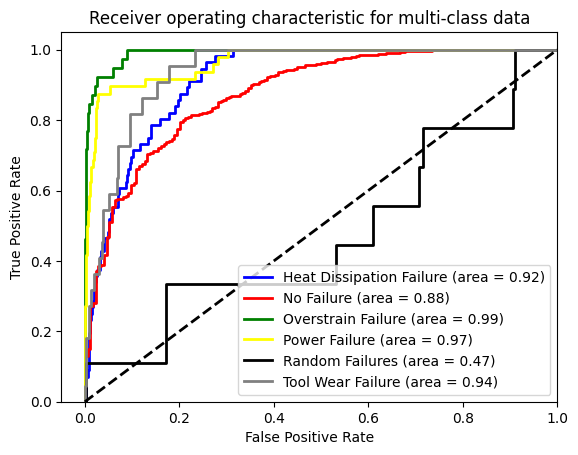

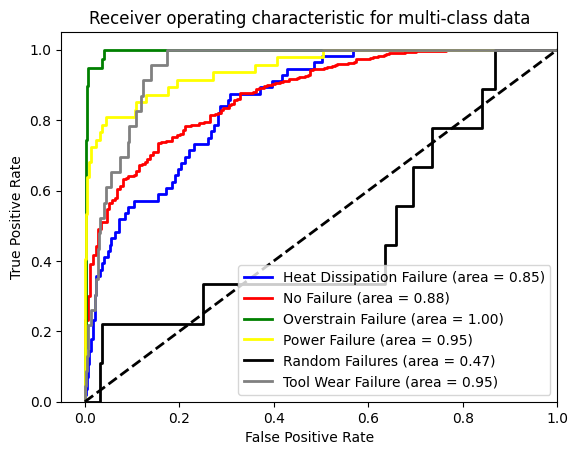

In [305]:
df_template = {"Classifier": ["LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression", "LogisticRegression"],
            "Method" : ["0.02", "0.03", "0.1", "0.3", "0.5", "SMOTE", "Cost-Sensitive"],
            "Accuracy": [],
            "AUC": [],
            "F1": [],
            "Precision": [],
            "Recall": [],
            "G-mean" : []}


smote = SMOTE()

lr_cs = LogisticRegression( solver="saga", max_iter=200)
poly_cs = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
cs_clf = Pipeline([('polynomial_features',poly_cs), ('logistic_regression',lr_cs)])

lr = LogisticRegression( solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
clf = Pipeline([('polynomial_features',poly), ('logistic_regression',lr)])

models = [clf, cs_clf]
for i in range(1):
    scoring = {"Accuracy":'balanced_accuracy', "AUC":'roc_auc', 
                    "F1":'f1', "Precision": 'precision', "Recall":'recall', "G-mean":make_scorer(geometric_mean_score)}
    cv = StratifiedKFold(n_splits=, random_state=i, shuffle=True)
    X=df_fail_train.to_numpy()
    y=df_fail_targ.to_numpy()

    # Scoring
    thresh_1_cv_results = thresh_cv(0.02, X, y, cv)

In [284]:
fpr_m

NameError: name 'fpr_m' is not defined

In [190]:
df_fail_targ.value_counts()

1    9652
0     112
3      95
2      78
5      45
4      18
Name: Failure Type, dtype: int64

In [72]:
X_train2

,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
5504,0.405405,0.405405,0.168801,0.648352,0.166008,1,0
5307,0.470270,0.470270,0.210710,0.425824,0.833992,1,0
1684,0.135135,0.135135,0.157159,0.559066,0.011858,1,0
2441,0.205405,0.205405,0.295693,0.373626,0.272727,1,0
0,0.151351,0.151351,0.222934,0.535714,0.000000,0,1
...,...,...,...,...,...,...,...
9336,0.172973,0.172973,0.324214,0.385989,0.810277,1,0
48,0.189189,0.189189,0.149593,0.688187,0.533597,0,0
8964,0.102703,0.102703,0.167637,0.564560,0.335968,0,1
5944,0.291892,0.291892,0.183935,0.469780,0.332016,0,1


In [73]:
X_train

,Process_temp_normalized,Air_temp_normalized,rpm_norm,Torque_norm,Tool_norm,Type_L,Type_M
9018,0.108108,0.108108,0.254545,0.434066,0.857708,1,0
1682,0.140541,0.140541,0.248094,0.443681,0.889328,0,0
4840,0.437838,0.437838,0.068622,0.825549,0.233202,1,0
1789,0.156757,0.156757,0.077419,0.872253,0.264822,1,0
4355,0.362162,0.362162,0.058065,0.734890,0.581028,0,0
...,...,...,...,...,...,...,...
4157,0.362162,0.362162,0.048094,0.780220,0.355731,1,0
1808,0.151351,0.151351,0.812903,0.123626,0.494071,1,0
6497,0.297297,0.297297,0.076833,0.844780,0.758893,1,0
9084,0.102703,0.102703,0.085044,0.983516,0.679842,1,0


In [74]:
from imblearn.over_sampling import SMOTE

Training Accuracy: 81.7 %
Model Accuracy Score : 82.35 %


C:\Users\tadpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


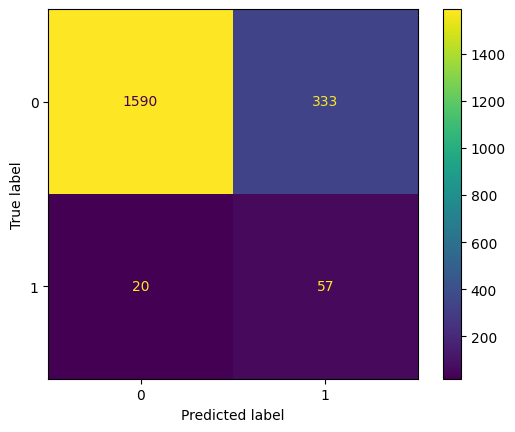

In [387]:
svc = LogisticRegression(solver="saga", max_iter=200)
smk=SMOTE(random_state=42)
X_res, y_res = smk.fit_resample(X_train2, y_train2)
svc.fit(X_res, y_res)
y_pred2 = svc.predict(X_test2)

train_acc2 = round(svc.score(X_train2, y_train2) * 100, 1)
val_acc2 = round(accuracy_score(y_pred2, y_test2) * 100, 2)

print("Training Accuracy:",train_acc2 ,"%")
print("Model Accuracy Score :",val_acc2 ,"%")
plot_confusion_matrix(svc, X_test2, y_test2)

(150, 3)


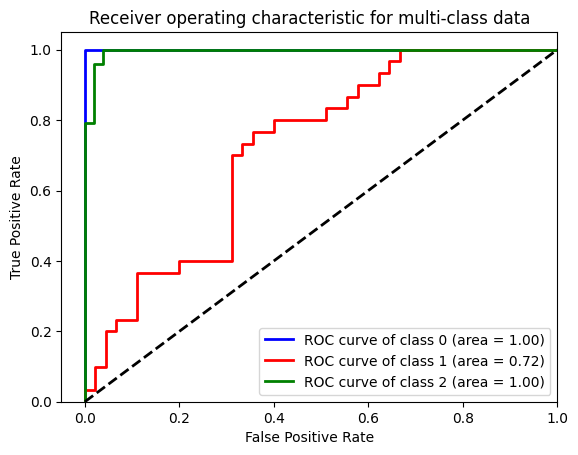

In [216]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from itertools import cycle

iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]
print(y.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5, random_state=0)

classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=0))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
lw=2
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [221]:
a = np.array([[0,1],[1,0]])
a[:, 0]

array([0, 1])

Training Accuracy: 97.2 %
Model Accuracy Score : 96.65 %


C:\Users\tadpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


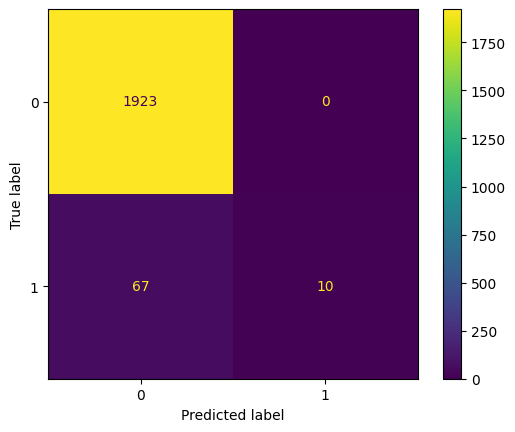

In [393]:


lr_cs = LogisticRegression( solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
svc = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_cs)])

smk=SMOTE(random_state=42)
X_res, y_res = smk.fit_resample(X_train2, y_train2)
svc.fit(X_train2, y_train2)
y_pred2 = svc.predict(X_test2)

train_acc2 = round(svc.score(X_train2, y_train2) * 100, 1)
val_acc2 = round(accuracy_score(y_pred2, y_test2) * 100, 2)

print("Training Accuracy:",train_acc2 ,"%")
print("Model Accuracy Score :",val_acc2 ,"%")
plot_confusion_matrix(svc, X_test2, y_test2)

Training Accuracy: 86.6 %
Model Accuracy Score : 86.65 %


C:\Users\tadpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


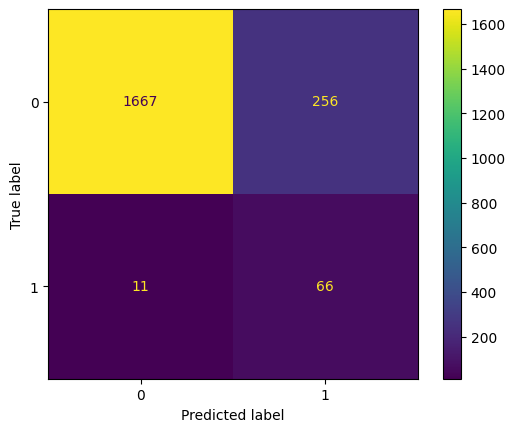

In [391]:


lr_cs = LogisticRegression( solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
svc = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_cs)])

smk=SMOTE(random_state=42)
X_res, y_res = smk.fit_resample(X_train2, y_train2)
svc.fit(X_res, y_res)
y_pred2 = svc.predict(X_test2)

train_acc2 = round(svc.score(X_train2, y_train2) * 100, 1)
val_acc2 = round(accuracy_score(y_pred2, y_test2) * 100, 2)

print("Training Accuracy:",train_acc2 ,"%")
print("Model Accuracy Score :",val_acc2 ,"%")
plot_confusion_matrix(svc, X_test2, y_test2)

Training Accuracy: 82.0 %
Model Accuracy Score : 83.2 %


C:\Users\tadpo\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


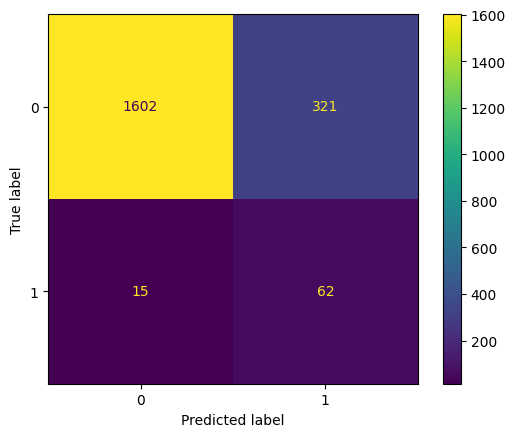

In [392]:


lr_cs = LogisticRegression(class_weight={0:0.03/0.97,1:1}, solver="saga", max_iter=200)
poly = PolynomialFeatures(degree = 2, interaction_only=False, include_bias=True)
svc = Pipeline([('polynomial_features',poly), ('logistic_regression',lr_cs)])


svc.fit(X_train2, y_train2)
y_pred2 = svc.predict(X_test2)

train_acc2 = round(svc.score(X_train2, y_train2) * 100, 1)
val_acc2 = round(accuracy_score(y_pred2, y_test2) * 100, 2)

print("Training Accuracy:",train_acc2 ,"%")
print("Model Accuracy Score :",val_acc2 ,"%")
plot_confusion_matrix(svc, X_test2, y_test2)